# Explainer notebook

This notebook is an explainer notebook related to the website you can see [here](https://marvel-relations.herokuapp.com/)

The explainer notebook gives additional details about the process and the code used to establish the analysis visualised on the website. Furthermore this notebook provides the basis of our decision made in the process. <br>

Follwoing table of contents gives an overview of the different topics and tools that has been used in the process. You can navigate to the section of your liking by clicking on a section. 

Note: if the network graphs are not displayed they are computationally too heavy. A picture has been inserted as well, however, the interacitivty within the graphs are lost. To get this experience please find the html files within the 'output_from_explainer_notebook' folder attached to the project.


# Table of contents
1. [Motivation](#motivation)
    1. [End user experience](#goal) 
    2. [Marvel Cinematic University dataset](#dataset)
2. [Data preprocessing and basic stats](#data_extraction)
    1. [The data preprocessing](#choices)
    2. [Basic statistics of MCU](#data_stats)  
3. [Tools, theory and analysis](#theory)  
    1. [Networks](#Network_def)
        1. [Network visualisation](#Network_vis)
        2. [The MCU character network graph](#Network_vis_MCU)
        3. [Movie and tv-series network](#Network_vis_movie_tv)
        4. [Organisation network](#Network_vis_organisation)
        5. [Team network](#Network_vis_team)   
    2. [Basic statistics](#basic_stat)
        1. [Degree distribution for the MCU network](#Degree_analysis_MCU)   
        2. [Degree distribution for organisation network](#Degree_analysis_org)  
        3. [Degree distribution for teams network](#Degree_analysis_team)  
    3. [Community detection](#community_detection)
        1. [Visualisation of communities](#community_vis)
        2. [Analysis of common characteristics in communities](#community_common)
        3. [Common characteristics using TF, IDF and TF_IDF](#community_tf_IDF)
    5. [Sentiment analysis of movie manuscripts](#sentiment_analysis)
        1. [Motivation for sentiment analysis using vader](#sentiment_motivation)
        2. [Calculation of sentiment score](#sentiment_calculation)
            1. [Sentiment score for each character](#sentiment_calculation_character)
            2. [Sentiment score of main characters for each movie](#sentiment_main_calculation_character)
                1. [The development of Thor](#sentiment_calculation_Thor)
            2. [Sentiment score for each movie](#sentiment_calculation_movie)
        3. [NLP of manuscripts](#NLP_manus)
            1. [Word Cloud of main characters using TC_IDF](#word_clouds_sentiment)
            2. [Dispersion plot and lexical diversity](#dispersion_plot)
        4. [Similarity measure](#similarity_measure)
        5. [Zipf's law](#Zipf_law)
4. [Recommendations](#recomentdations)
5. [Discussion](#discussion)
    2. [Further analysis](#further_analysis)
6. [Contributions](#contribution)



## Motivation <a name="motivation"></a>

The Marvel Cinematic Universe (MCU) is extremely complex with its 3000 characters, 38 tv-series and 26 movies. It can be difficult to keep track of how the different movies and tv-series are connected and which order you should watch them in, in order to fully understand the plot. To determine which order the movies and tv-series should be watched, it is essential to investigate how the movies and tv-series are connected. Which movies and tv-series are sequels and which are parallel stories that are important to follow in order to understand the plot? And which can be watched independently? This is the main focus of the project and the steps for reaching our goals are explained in detail within this notebook.

Throughout the analysis, it is assumed that if a character connects movies or tv-series, then the story lines within these are either dependent on or affected by the events related to the character appearances.

#### End user experience <a name="goal"></a>
Our goal is to guide the end user through the Marvel Cinematic Universe, by firstly introducing the network and it’s high complexity. The user will then get an understanding of the most important teams and organisations within the network. When a basic understanding of the network is reached, the user will be guided through how the main characters are connected to the different movies and tv-series within the infinity saga and how they can be separated into different communities. These are important findings for the understanding of how the storylines are connected within the different movies and tv-series. The user will then get more in-depth insights into the most important characters and movies through their sentiment. Lastly, the user will be provided with recommendations on which movies to watch independently and which to watch dependently in order to understand the plots fully. 

The end user should be able to go through the findings of MCU with ease and achieve an understanding of how the storylines within the movies and tv-series are connected.



#### Marvel Cinematic University dataset <a name="dataset"></a>

The data sources used are:
* Marvel Cinematic Universe Fandom Wiki (home page can be found [here](https://marvelcinematicuniverse.fandom.com/wiki/Marvel_Cinematic_Universe_Wiki)
    * Characters are extracted from [this link](https://marvelcinematicuniverse.fandom.com/wiki/Category:Characters)
    * Teams are extracted from from [this link](https://marvelcinematicuniverse.fandom.com/wiki/Category:Teams)
    * Organisations are extracted from [this link](https://marvelcinematicuniverse.fandom.com/wiki/Category:Organizations) 
    * Movie are extracted from [this link](https://marvelcinematicuniverse.fandom.com/wiki/Category:Movies)
    * Tv-series are extracted from [this link](https://marvelcinematicuniverse.fandom.com/wiki/Category:TV_Series)  
* Movie manuscript -  the data was downloaded through [this webpage](https://www.kaggle.com/pdunton/marvel-cinematic-universe-dialogue)


The MCU fandom wiki pages provide useful information about the characters, movies, tv-series, teams and organisations. The webpages are scraped using python and the fandom APIs. When utilizing the data extracted from the webpages, we can gain useful information about how the MCU is constructed and get insights into how the different characters are connected to each other and how the different storylines are related. This information is exactly what we need in order to successfully create a guide for which movies to watch and when.    

The movie manuscripts are used in order to understand the main characters and movies better and through a sentiment analysis it will be investigated if the associated sentiments reflect certain events or character characteristics. In addition to this the analysis will be used in order to capture potential temporal changes within the characters and storylines. The data frame contains columns with the character name, character lines, movie name for each line and release year for each movie. We will use the character lines from 18 movies within the infinity saga.







## Data preprocessing and basic stats <a name="data_extraction"></a>

    
#### The data preprocessing <a name="choices"></a>
The characters, teams, organisations, movies and tv-series were extracted by downloading the fandom wiki pages using the fandom API and saving the title of each page in the query. 

After the characters, teams and organisations were extracted it was necessary to do some preprocessing in order to extract the text from each character’s, team’s and organisation’s page. For instance, some of the names had to be changed in order to reach the character pages, for instance, “A’Lars” had to be changed to “A%27Lars” in order to coincide with the webpage url. We also had to replace ‘/’ with ‘%’ in some of the names in order to save the data correctly. 

After extracting the texts from wiki pages, we could create the links between the characters and identify the characters within each team and organisation. 

A link was created between two characters if one character was mentioned in another character’s text. The following regex were used in order to extract character names from the json files:

The links between the movies, tv-series and characters were extracted from each character’s wiki page by using regex to search in the information box where all the movies and tv-series were listed. We decided to only extract the movie and tv-series if a character had actually appeared in it and had not just been mentioned in it. The regexes used are listed below.

The links between the teams and characters were derived using several regexes to search in the information box after the founders, leaders, former leaders, members and former members within each team. Using founders as an example, we first had to extract the text within the founders section only using the first regex below. Next we had to extract the names using the second regex below:

As some of the characters had several names separated by / and | we had to remove these and only extract one name using:

The same was done for organisations when creating the links between the organizations and characters. 

After extracting the characters for each team and organisation, some more preprocessing had to be done as several teams and organiastions had more than one name depending on which movie or tv-series they appeared in. Therefore the teams and organisations and the characters within these had to be gathered in order to have one single name for each team and organisation. Furthermore, some of the teams contained different aliases for the same character and therefore, these were all converted to their original name. 

The dataframe downloaded with the movie manuscript (MCU dataframe) had to be preprocessed as well in order to work with the data and dialogue efficiently. For instance, the MCU dataframe contained different aliases for the same character and therefore all aliases were converted to their original name. The final data frame consists of 5 columns (character name, movie, release year, character line, word count) and 15,724 rows.

All the steps and code for the data cleaning and preprocessing can be found in the “Preprocessing” notebook.



#### Basic statistics of MCU <a name="data_stats"></a>
The MCU network consists of 3308 nodes and 6675 edges. A more in depth analysis of the basis stats of the network can be found in [this section](#basic_stat)


### Loading packages

## Functions applied in the analysis <a name="functions"></a>
In this section general functions that are applied in the overall analysis are defined. Read the definition tekst for each function to understand its purpose.


In [62]:
def remove_names(raw_text):
    '''
    This function removes character names, movie names and tv-series names. 
    Furthermore it removes headers and references.
    
    '''
    # List of names
    Names = list(df_characters['name'])

    # remove header
    # [[1970s#1970|May 29, 1970]]
    pattern_header = r'(\[\[(.*?)\]\])'
    #found_head = re.findall(pattern_header, raw_text)
    raw_text =  re.sub(pattern_header, "", raw_text)

    
    patterns = r'(<(.*?)>)'
    raw_text = re.sub(patterns,"", raw_text)
    
    pattern2 = r'\'\'(.*?)\'\' '
    raw_text = re.sub(pattern2, "", raw_text)

    
    # Find names in texts
    pattern = r"(\b[A-Z][a-z]+('s)?\b)"
    found_names = re.findall(pattern, raw_text)

    # get singular forms, and remove doubles
    found_names = set([name[0].replace("'s","") for name in found_names])

    # remove all the words that look like names but are not included in the NAMES
    found_names = [name for name in found_names if name in Names]
    
    # add Zelda to the list
    found_names.append('coulson')
    found_names.append('parker')
    
    # remove names from text 
    for name in found_names:
        raw_text = re.sub(name + "('s)?", "", raw_text) # include plural forms
    return raw_text

def tokenize(text):
    '''
    Input: character dialouge from mcu
    Output: text which has been tokensied, lemmatized and set to lower case
    
    The function starts by tokenizing the text. Then it removes stopwords, punctuations and sets 
    all letters to lower case. Lastly, the words are lemmatized. 
    '''
    
    tk = WordPunctTokenizer()
    
    stop = nltk.corpus.stopwords.words('english')
    lemmatizer = WordNetLemmatizer()
    
    text = remove_names(text)
    
    # tokenize 
    tokens = tk.tokenize(text)

    # remove punctuation and stopwords and to lowercase
    tokenised = [t.lower() for t in tokens if t.lower() not in stop if t.isalpha()]

    # lemmatize words
    lemmatised = [lemmatizer.lemmatize(w) for w in tokenised]
    return lemmatised


def get_tokens(data, name):
    '''
    Input: 
        data = the dictionary of each characters' dialogue
        name = the name of the character
    Output: tokens and text concatenated
    
    '''
    text_string = ' '.join(data[name])
    
    # clean the text
    tokens = tokenize(data[name])

    tokens = [i for i in tokens if len(i) > 2]
    
    
    remove_words = ['small','file','category','thumb', 'jpg', 'png', 'left', 'quote', 'page', 'toomes','mentioned']
    tokens = [ x for x in tokens if x not in remove_words ]
    tokens = [ x for x in tokens if x not in 'thumb' ]
    
    names = list(df_characters['name'].values)
    names = [t.lower() for t in names if t.lower()]
    names.append('fisk')
    names.append('coulson')
    tokens = [ x for x in tokens if x not in names ]
    
    return tokens


# Create a dicitonary for each community with a list of tokens
def get_community_tokens(dict_community, characters_raw_text):
    '''
    This function return a dictionary with the clean tokens 
    with communities as keys and the tokens as values in a list. 
    
    '''
    clean_tokens_dict = {}
    for com,char in dict_community.items():
        tokens_list = []
        for name in list(char):
            text_string = characters_raw_text[name]
            tokens = get_tokens(characters_raw_text, name)
            tokens_list.append(tokens)
        flat__tokens_list = [item for sublist in tokens_list for item in sublist]
        clean_tokens_dict[com] = flat__tokens_list 
    return clean_tokens_dict


def TF(content):
    N = len(content) # number of words in the document
    fdist = FreqDist(content)
    fdist = {k: v / N for k, v in fdist.items()} #
    tf = {w: fdist[w] for w in set(content)}
    return tf

def Compute_tf_IDF(content): 
    tf = {c: TF(t) for c, t in content.items()}
    idf = IDF(content)
    tf_idf = TC_IDF(content, tf, idf)
    return tf, idf, tf_idf

def TC_IDF(content, tcc, idf_word):
    '''
    computes tf_IDF/tc_IDF using the above functions. 
    Retunrs a dictionary where the TF_IDF is compuotes for each word.
    '''
    tc_idf = {}
    for c in content:
        tc_idf_c = {}
        for t, tc in tcc[c].items():
            tc_idf_c[t] = tc*idf_word[t]

        tc_idf[c] = tc_idf_c
    return tc_idf

#calculating IDF for each word
def IDF(content):
    '''
    This function somputes idf for all words in content
    
    Input: A dictionary with the cleaned tokens for each document 
    Output: The IDF-score for each word
    
    '''

    vocab = set.union(*[set(words) for words in content.values()])
    idf_word= {}

    for word in vocab:
        count = 0
        for key in content:
            document = content[key]
            if word in document:
                count += 1
        idf_word[word] = math.log(len(content)/count)

    return idf_word

def get_top_N(my_dict,N):
    '''
    Function that returns the top N words
    '''
    return sorted(my_dict.items(), key = lambda item: item[1], reverse = True)[0:N]


In [59]:
def degree_in_out(G):
    '''
    Function that returns the in and out degree distribution along with th total degree distribution
    Input = Graph
    Output = in degree, out degree and total degree
    '''
    degree_dist_out = []
    degree_dist_in = []
    keys = [n for n in G.nodes()]
    degree_dist_out = [G.out_degree(i) for i in keys]
    degree_dist_in = [G.in_degree(i) for i in keys]
    degree_total = degree_dist_out+degree_dist_in
    
    return degree_dist_out,degree_dist_in,degree_total

def most_connected_in_out(G, dicts,n):
    '''
    Function that prints in and out degree for the n most connected characters
    '''
    # Most connected components - in degree
    print("In-degree")
    print(sorted([(i,G.in_degree(i)) for i in list(dicts.keys())], key=lambda x: x[1], reverse=True)[0:n])
    
    print("\nout-degree")
    # Mostconnected components - out degree
    print(sorted([(i,G.out_degree(i)) for i in list(dicts.keys())], key=lambda x: x[1], reverse=True)[0:n])
    
def most_connected(G, dicts,n):
    '''
    Function that prints in and out degree for the n most connected characters
    '''
    # Most connected components - in degree
    print("Degree")
    print(sorted([(i,G.degree(i)) for i in list(dicts.keys())], key=lambda x: x[1], reverse=True)[0:n])

def sort_graph_property(graph):
    return sorted(dict(graph).items(), key = lambda x: x[1], reverse = True)


def format_table(data):
    return ['{}: {}'.format(r[0], round(r[1],3)) for r in data]

def binning_real_numbers(x, no_bin):
    '''
    Function that bins numbers into bins using np.histogram
    '''
    hist, bins = np.histogram(x, bins=no_bin)
    center = (bins[:-1] + bins[1:])/2 # finding the center of the interval and making them of samme length
    return hist, bins, center


def plot_distribution(x, no_bin, title):
    '''
    Function to visualise distribution using bins and histogram
    '''
    hist, bins, center = binning_real_numbers(x, no_bin)
    
    width = 0.5 * (bins[1] - bins[0]) # so you can see the edges
    center = (bins[:-1] + bins[1:])/2 # finding the center of the interval and making them of samme length
    plt.figure(figsize=(15,7))
    plt.bar(center, hist, align='center', width=width, color = 'magenta')
    plt.title(title)
    plt.xlabel("Degree")
    plt.ylabel("Values")
    plt.show()

### Basic network statistics  <a name="basic_stat"></a>
In this section the basic statistics of the MCU network, the organisation network and the teams network are explored in order to gain a general understanding of the network properties.

#### Degree analysis  <a name="Degree_analysis"></a>


To explore the characters' importance further it is relevant to examine their degree and their centrality measures. In this case we have chosen to examine the character using betweeness centrality, eigenvector centrality and degree centrality.

> * **Betweenes centrality<br>**
Betweenes centrality measures how often a node is part of the shortest path between two other nodes, meaning how many times a nodes is passed in order to get to another node.
> * **Eigenvector centraility <br>**
Eigenvector centrality examines if important nodes are linked to each other and thereby adding to their importance. e.g. if the main characters are linked to each other.
> * **Degree centrality <br>**
Degree centrality is the probability that a nodes is passed through when traversing the network

(Network science book)

First the centrality metrics are computed for the giant connected component.

In [64]:
degree_all = sort_graph_property(D_GCC.degree)
in_degree_all = sort_graph_property(D_GCC.in_degree)
out_degree_all = sort_graph_property(D_GCC.out_degree)
betweenness_all = sort_graph_property(nx.algorithms.centrality
                                      .betweenness_centrality(D_GCC))
eigenvector_all = sort_graph_property(nx.algorithms.centrality
                                      .eigenvector_centrality(D_GCC))
degree_centr_all = sort_graph_property(nx.algorithms.centrality.degree_centrality(D_GCC))



Create a dataframe with the information for the top 10 characters within each metric.

In [65]:
# Create dataframe with relevant information
df = pd.DataFrame({'Out-degree': format_table(out_degree_all[:10]),
              'In-degree': format_table(in_degree_all[:10]),
              'Total degree': format_table(degree_all[:10]),
                'Betweenness': format_table(betweenness_all[:10]),
              'Eigenvector': format_table(eigenvector_all[:10]),
              'Degree centrality': format_table(degree_centr_all[:10])})
df

Out-degree               In-degree             Total degree  \
0   Phil Coulson: 81       Phil Coulson: 130        Phil Coulson: 211   
1          Quake: 68       Jessica Jones: 86         Melinda May: 143   
2       Iron Man: 61         Melinda May: 85       Jemma Simmons: 136   
3  Jemma Simmons: 60       Jemma Simmons: 76       Jessica Jones: 124   
4    Melinda May: 58  Alphonso Mackenzie: 74           Luke Cage: 121   
5       Punisher: 56           Luke Cage: 69  Alphonso Mackenzie: 113   
6      Luke Cage: 52            Leo Fitz: 63            Leo Fitz: 112   
7   Steve Rogers: 52                Thor: 62                Thor: 110   
8       Leo Fitz: 49        Peggy Carter: 53                Quake: 96   
9      Daredevil: 48          Grant Ward: 46             Iron Man: 93   

            Betweenness                Eigenvector          Degree centrality  
0   Phil Coulson: 0.054        Phil Coulson: 0.345        Phil Coulson: 0.134  
1   Steve Rogers: 0.032         Melinda May: 0.267         Melinda May: 0.091  
2  Jessica Jones: 0.022       Jemma Simmons: 0.256       Jemma Simmons: 0.086  
3      Daredevil: 0.021            Leo Fitz: 0.221       Jessica Jones: 0.079  
4      Luke Cage: 0.021  Alphonso Mackenzie: 0.208           Luke Cage: 0.077  
5           Thor: 0.021          Grant Ward: 0.206  Alphonso Mackenzie: 0.072  
6        Punisher: 0.02    Lincoln Campbell: 0.176            Leo Fitz: 0.071  
7      Nick Fury: 0.019        Gideon Malick: 0.17                 Thor: 0.07  
8   Peggy Carter: 0.019        Glenn Talbot: 0.156               Quake: 0.061  
9       Iron Man: 0.015        Lance Hunter: 0.147            Iron Man: 0.059

From the table it seems that the main characters are the most prominent ones in the network which confirms our assumption. The 10 top characters have the largest out- and in-degree, meaning that they refer to and are referred to by many other characters and thus it is assumed that they have a high importance to many characters throughout the marvel timeline.

The first thing that is noticed is that Phil Coulson is the character with the highest importance. He is the character that scores the highest within all centrality measures, meaning that he is linked to many characters,  many characters travel through Phil Coulson in order to get to another node and he is often associated with other important characters. Therefore it is expected that Phil Coulson will be a consistent character throughout the analysis. 

When examining the eigenvector centrality, it is noticed that more characters that are not mentioned within the other centrality measures are mentioned, such as 'Glenn Talbot', 'Gideon Malick' and 'Lincoln Campbell'. These are characters that often are associated with other important characters, e.g. 'Glenn Talbot' (a high-ranking officer within Hydra and Shield) who has many connections with Phil Coulson.

#### Degree distribution of the MCU network


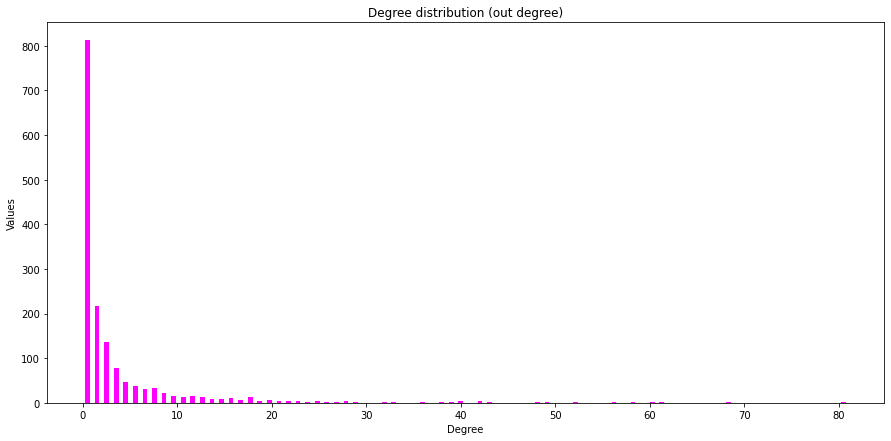

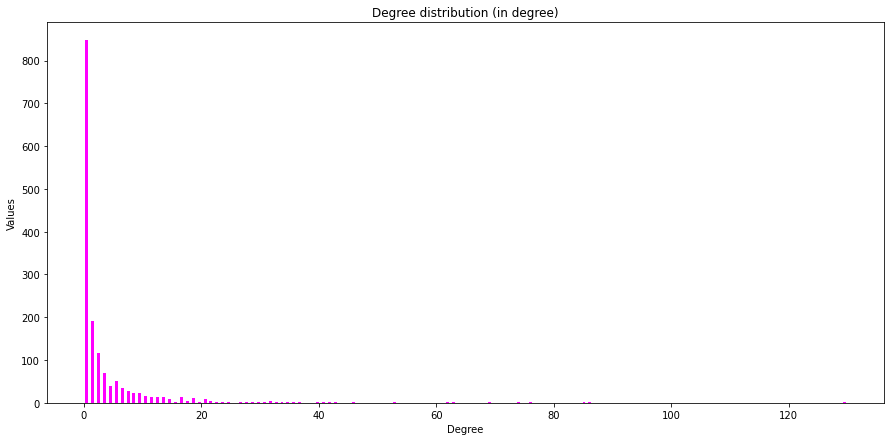

In [67]:
degree_dist_out,degree_dist_in,degree_total = degree_in_out(D_GCC)
plot_distribution(degree_dist_out, np.max(degree_dist_out)-1, "Degree distribution (out degree)")
plot_distribution(degree_dist_in, np.max(degree_dist_in)-1, "Degree distribution (in degree)")

The first observations of the degree distributions is that both seem to follow a power law, indicating that there are a lot of nodes that have a small degree and a few nodes that have a high degree. 

Find the 10 characters with highest in- and out-degree

In [68]:
dict_all = dict((n,d) for n,d in G.nodes(data=True))
most_connected_in_out(G, dict_all, 10)

In-degree
[('Phil Coulson', 130), ('Jessica Jones', 86), ('Melinda May', 85), ('Jemma Simmons', 76), ('Alphonso Mackenzie', 74), ('Luke Cage', 69), ('Leo Fitz', 63), ('Thor', 62), ('Peggy Carter', 53), ('Grant Ward', 46)]

out-degree
[('Phil Coulson', 81), ('Quake', 68), ('Iron Man', 61), ('Jemma Simmons', 60), ('Melinda May', 58), ('Punisher', 56), ('Luke Cage', 52), ('Steve Rogers', 52), ('Leo Fitz', 49), ('Daredevil', 48)]


It can be seen that Phil Coulson is a character that has the highest in and out-degree in the character graph. This makes sense as he is a character that is mentioned by many characters and has a connection to many characters. This goes both for the 'movie world' and the 'tv-series' world. Furthermore he is a main character in 'Agents of S.H.I.E.L.D.', which is a tv-serie with the highest degree. The results clearly shows that he is an important character. 

Furthermore it can be seen that it is mainly main characters of movies/tv-series that has either the highest in- or out-degree degree. This is seen with 'Jessica Jones', 'Luke Cage', 'Thor', 'Peggy Carter', 'Iron Man', 'Punisher', 'Daredevil' etc. 

From this it can be concluded that there is a relation between the number of degrees and the character's role in the movies/tv-series.

#### Comparison to power of law  <a name="powerlaw"></a>
The exponent of the degree distribution is found by using the `powerlaw` package. The exponent is found for both the in- and out-degree distribution. 

In [72]:
in_degrees = [D_GCC.in_degree(i) for i in D_GCC.nodes()]
out_degrees = [D_GCC.out_degree(i) for i in D_GCC.nodes()]

in_degrees = [x for x in in_degrees if not x == 0]
out_degrees = [x for x in out_degrees if not x == 0]

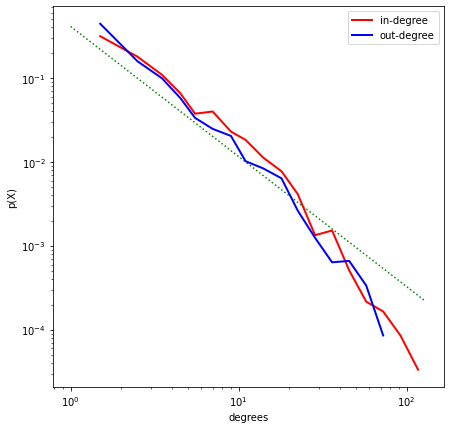

In [74]:
import powerlaw
#Fit and visualize
plt.figure(figsize = (7,7))
fig = powerlaw.plot_pdf(in_degrees, color='r', linewidth=2, label="in-degree")
fit = powerlaw.Fit(in_degrees, xmin=1, discrete=True)

fit.power_law.plot_pdf(linestyle=':', color='g')
powerlaw.plot_pdf(out_degrees,  color='b', linewidth=2, label='out-degree')
fit = powerlaw.Fit(out_degrees, xmin=1, discrete=True)
plt.legend(loc="upper right")
fig.set_ylabel("p(X)")
fig.set_xlabel(r"degrees")
plt.show()

It can be seen that the in and out-degree follow each other closely with small variations. The in- and out-degree distribution seem to follow the expected power law distribution quite well, starting a bit above the line and falling beyond the line as the number of degrees increases. 

When the distribution is above the curve it indicates that the probability of observing a high-degree node, or hub, is several orders of magnitude higher. This supports the first observations of the degree distribution, where it was evident that there were many nodes with small degree and few nodes with high degree (e.g. Phil Coulson and Jessica Joines). This can be related to the number of main characters versus the number secondary characters. It makes sense that the main characters has a high degree, however as there are a lot more secondary characters, with a little influence - resulting in a low degree, these numbers affects the degree distribution to follow a power law distiribution.  

As both in- and out-degree distribution seem to somewhat follow a power law distirbution, it can be interesting to investigate the exponent of the power law, to examine in what regime the network belongs to. 

In [75]:
print("The exponent of the in-degrees:  {}".format(powerlaw.Fit(in_degrees, discrete = True).alpha))
print("The exponent of the out-degrees: {}".format(powerlaw.Fit(out_degrees, discrete = True).alpha)) 

Calculating best minimal value for power law fit
The exponent of the in-degrees:  3.1203045188385863
Calculating best minimal value for power law fit
The exponent of the out-degrees: 3.0061574021489212


It can be seen that the fitted exponent is a lot close to each other, however the exponent is a bit higher for the in-degree. For both exponents it is seen that 𝛾>3, which means that the distirbution belongs to the random network regime and both first $k$ and second moment are finite $k^2$. However they are very close to the Scale-Free Regime (2<𝛾<3), which is ideal as this is the most interesting regime theoretically. 

A Scale free nework follows the power-law and is inhomogeneous, meaning that most nodes have few links (such as the secondary characters) but a few nodes are highly connected (such as the main characters), resulting in hubs with a large number of links. 

For this network it makes sense that the network is inbetween the scale free regim and the random netwrok regime, as we have many hubs, but as the marvel universe is such a connected universe with many links across movies and tv-series, that it affects the degree distribution. 

(Network Science, section 4.7)


Next it could be interesting to see the degree distirbution compared to a random network to see the resemblence compared to the resemblence of the power law distribution. 

### Random network resemblence  <a name="random_network_resemblence"></a>

We will compare the degree distribution of the undirected graph to a **random network** with the same number of nodes and probability of connection **p**.

To create a random network with the same number of nodes and <i>p </i>, the same process is repeated as in assignment 3 using equation 3.3 from Network Science, section 3.3.

The average degree $\langle k \rangle $ is defined as: 

$\langle k \rangle = p \cdot (N-1) $


From this it is possible to derive $p$:

$p = \frac{\langle k \rangle}{N-1}$

It is possible to find the probability connection by using the equation above as $\langle k \rangle$.

In [76]:
# Transform GCC to undirected graph 
U_GCC = D_GCC.to_undirected()

# get a list of the degrees for the undirected graph
degrees = [U_GCC.degree(i) for i in U_GCC.nodes()]

# number of nodes
N = U_GCC.number_of_nodes()

# find the probability of connection
# p = <k>/ (N-1), where <k> is the average degree

# average degree
k = np.mean(degrees)

# probability connection
p = k/(N-1)

In [77]:
# create the ER network with the same N and p as the Zelda undirected GCC
ER = nx.erdos_renyi_graph(N, p)

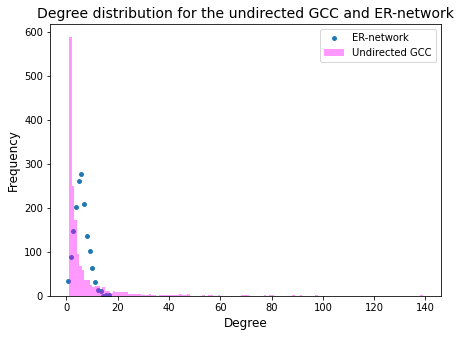

In [78]:
# bin the degree distribution for the undirected GCC
hist_gcc, bins_gcc, centered_gcc = binning_real_numbers(degrees,np.max(degrees)-1)

# bin the degree distribution for the ER random graph
ER_degrees = [ER.degree(n) for n in ER.nodes()]
hist_er, bins_er, centered_er = binning_real_numbers(ER_degrees, np.max(ER_degrees)-1)

# plot the Poisson degree distribution
plt.figure(figsize = (7,5))
plt.bar(centered_gcc, hist_gcc, width = 1, alpha = 0.4, color = 'magenta')
plt.scatter(centered_er, hist_er, s = 15)
plt.legend(["ER-network","Undirected GCC"])
plt.xlabel("Degree", fontsize = 12)
plt.ylabel("Frequency", fontsize = 12)
plt.title("Degree distribution for the undirected GCC and ER-network", fontsize = 14)
plt.show()

Fromt this it can be seen that the distributions are not similar. For instance it can be seen that the random network does not have any nodes with more than approx. 250 conncetions. This is because all links are equally likely in the ER-network and the degree distribution will therefore be more 'balanced'. For real networks, such as the marvel network, there are often hubs and very highly connected nodes, such as the main characters of all the movies/tv-series (Phil coulson, Jessica Jones and Iron Man). This supports the findings when looking into the power law distribution. 

#### Degree distribution on graph with movies, tv-series and characters
Next it could be interesting to examine the degree distribution of the graph with the movies, tv-series and characters. This graph is connected with characters, tv-series and movies as nodes. The links btween the characters are still if a character is mentioned on another characters page. The links to tv-series and movies exisits between a character and tv-series/movie if a character is present in the respective movie/tv-serie. 

Therefore we expect to find the shows that are most connected, also meaning the shows with the most characters present/mentioned. 

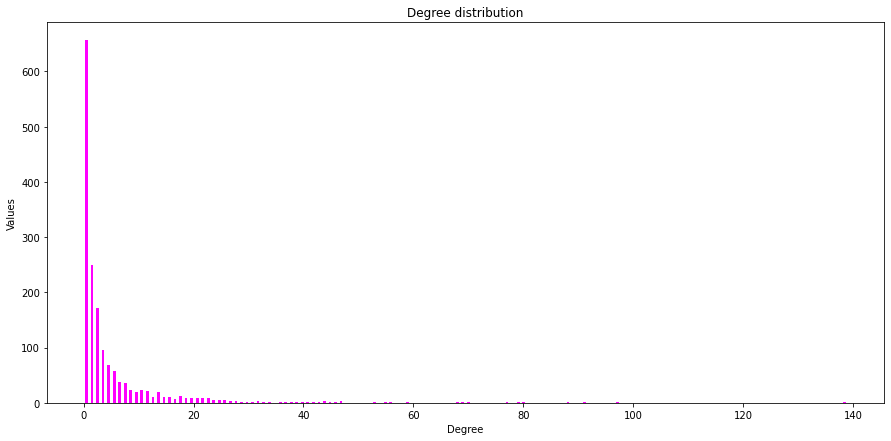

In [60]:
keys = [n for n in U_GCC_with_movies_tv_series.nodes()]
degree_dist = [U_GCC_with_movies_tv_series.degree(i) for i in keys]
plot_distribution(degree_dist, np.max(degree_dist)-1, "Degree distribution")

In [61]:
dict_all = dict((n,d) for n,d in U_GCC_with_movies_tv_series.to_directed().nodes(data=True))
most_connected(U_GCC_with_movies_tv_series, dict_all, 10)

Degree
[('Phil Coulson', 139), ('Melinda May', 97), ('Jessica Jones', 91), ('Jemma Simmons', 88), ('Alphonso Mackenzie', 80), ('Leo Fitz', 79), ('Luke Cage', 79), ('Quake', 77), ('Thor', 70), ('Iron Man', 69)]


From this we can see that it is actually all the tv-series that has the highest degree (undirected graph). As a lot more characters are coming and going in a tv-series compared to a movie, it makes sense that the tv-series have the highest degrees. 

From this information it can de interpreted that the 'Agents of S.H.I.E.L.D.' is that tv-serie that has the most connections, which means that many characters are present or has a relation to that tv-serie. 

#### Degree distribution on graph with teams

Next it could be interesting to examine the degree distribution of the graph with teams and characters. 

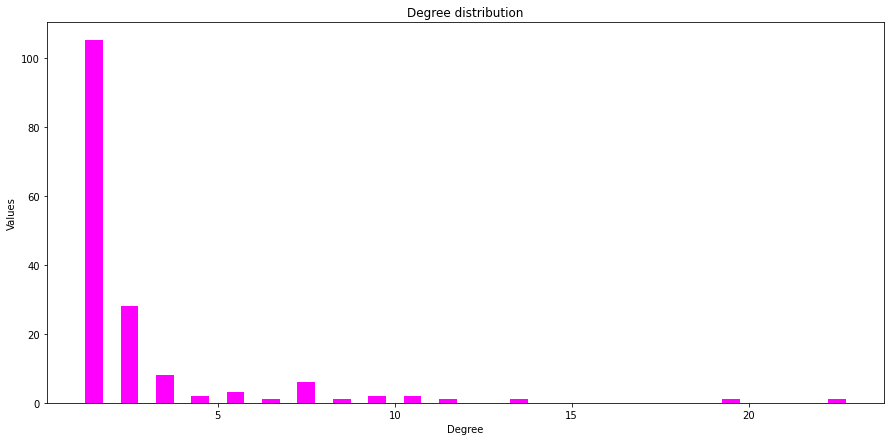

In [93]:
keys = [n for n in GCC_team.nodes()]
degree_dist = [GCC_team.degree(i) for i in keys]
plot_distribution(degree_dist, np.max(degree_dist)-1, "Degree distribution")

In [94]:
dict_all = dict((n,d) for n,d in GCC_team.nodes(data=True))
most_connected(GCC_team, dict_all, 10)

Degree
[('Avengers', 23), ('STRIKE', 19), ('Asgardian Royal Family', 13), ('Howling Commandos', 11), ('Zombie Outbreak Survivor Group', 10), ('Black Widows', 10), ('Guardians of the Galaxy', 9), ('Loki Variant Army', 9), ('Guardians of the Multiverse', 8), ('Deke Squad', 7)]


It is seen that Avengers and STRIKE are the teams with the highest number of degrees (undirected). As these teams are the two central teams within MCU it makes sense that these are connected to most characters.

#### Degree distribution on graph with organisations

Next it could be interesting to examine the degree distribution of the graph with organisations and characters.

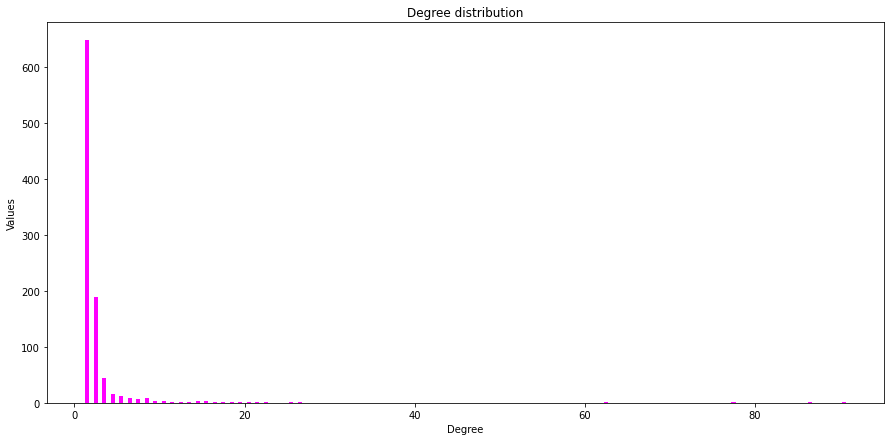

In [95]:
keys = [n for n in GCC_org.nodes()]
degree_dist = [GCC_org.degree(i) for i in keys]
plot_distribution(degree_dist, np.max(degree_dist)-1, "Degree distribution")

In [96]:
dict_all = dict((n,d) for n,d in GCC_org.nodes(data=True))
most_connected(GCC_org, dict_all, 10)

Degree
[('S.H.I.E.L.D.', 91), ('HYDRA', 86), ('New York City Police Department', 77), ('United States Armed Forces', 62), ('Hand', 26), ('Ravagers', 26), ('Kree Empire', 25), ('Stark Industries', 22), ('Ten Rings', 21), ('Time Variance Authority', 20)]


It is seen that SHIELD and HYDRA are the two organisations with the highest number of degrees (undirected). As these organisations are the central oppponents within the MCU it makes sense that these are connected to most characters.

### Community detection  <a name="community_detection"></a>

There are many predefined communities within the Marvel universe through the teams (Avengers, Strike ect.) and the organisations (Hydra, SHIELD ect.). However, it could be interesting to investigate how the communities are defined through the Louvain community detection algorithm (link til Louvain community detection). Perhaps there are some other interesting themes linking the characters together in a community. This is explored in order to investigate how the storylines are connected.

The Louvain algorithm is a hierarchical clustering algorithm that recursively merges communities into a single node. It is a method to detect communities from large networks. The method works as a greedy optimizaiton method and use the modularity to detect the communities by maximising the modularity score for each community. The modularity score is the strength of the division within a network. Networks with high modularity have dense connection between nodes within the same communities but are sparse between nodes within different communities.

The method works as a stepwise algorithm. First all small communities are detected by optimizing modularity locally on all nodes, this is followed by a grouping of all small communities into one node. This step is repeated until all communities are detected.



In [97]:
def get_community_colors(n):
    '''
    Function that creates a color for each community
    '''
    return ['#%02x%02x%02x' % tuple(np.random.randint(256, size = 3)) for _ in range(n)]


Using the character dataframe, the undirected giant connected component and the character pages raw text.

In [98]:
# Load data relevant for community detection
file_to_read = open("./data_to_analysis/marvel_characters_raw_text.pickle", "rb")
characters_raw_text = pickle.load(file_to_read)
file_to_read.close()

##### Create community partition
First we will create a community partition using the community_louvain algortihm. Afterweards the number of communities are calculated and a color is assigned each community.

In [99]:
# copy of graph and create a community graph
community_graph = U_GCC.copy()

partition_U_GCC = community_louvain.best_partition(community_graph)

# creaate color dependent on community
no_communities = len(set(partition_U_GCC.values()))
colors = get_community_colors(no_communities)
com = np.arange(0,no_communities)
clr = {com[i]: colors[i] for i in range(no_communities)}
color_com = {}

for keys,values in partition_U_GCC.items():
    color_com[keys] = {'color': clr[values]}

####  Visualisation of communities <a name="community_vis"></a>

Next the communities are visualised using pyvis with the relevant attributes for the communities. 

In [102]:
# Create graph attributes for the visualisatioin
nx.set_node_attributes(community_graph,attr_org_teams)
titles = {}
for name, data in community_graph.nodes(data = True):
    title = 'name: '+ name + '</br>Community: '+ str(partition_U_GCC[name]) \
                    +'</br>movies: ' + str(data['movies']) +'</br>tv-serie: ' + \
                    str(data['tv-serie'])+'</br>Teams: ' + str(data['Team(s)']) \
                    +'</br>Organisation: ' + str(data['Organisation(s)']) + ' </br>citizen: ' \
                    + str(data['citizen']) + ' </br>specie: ' + str(data['specie']) + ' </br>status: ' \
                    + str(data['status'])
    titles[name] = title

# update attributes
degrees = dict(community_graph.degree)
degrees.update((key,value) for key, value in degrees.items())

nx.set_node_attributes(community_graph, titles, 'title')
nx.set_node_attributes(community_graph,degrees,'size')
nx.set_node_attributes(community_graph,color_com)




The graph can be seen in the html file in the folder, however they are not loaded in the notebook due to long loading time. 

In [103]:
# Create graph with all characters and movies as nodes!
pyvis_graph(community_graph, 'Community Detection of Character graph', 
            'output_from_explainer_notebook/community_detection_character_graph.html',gravity = -30,damping=1)

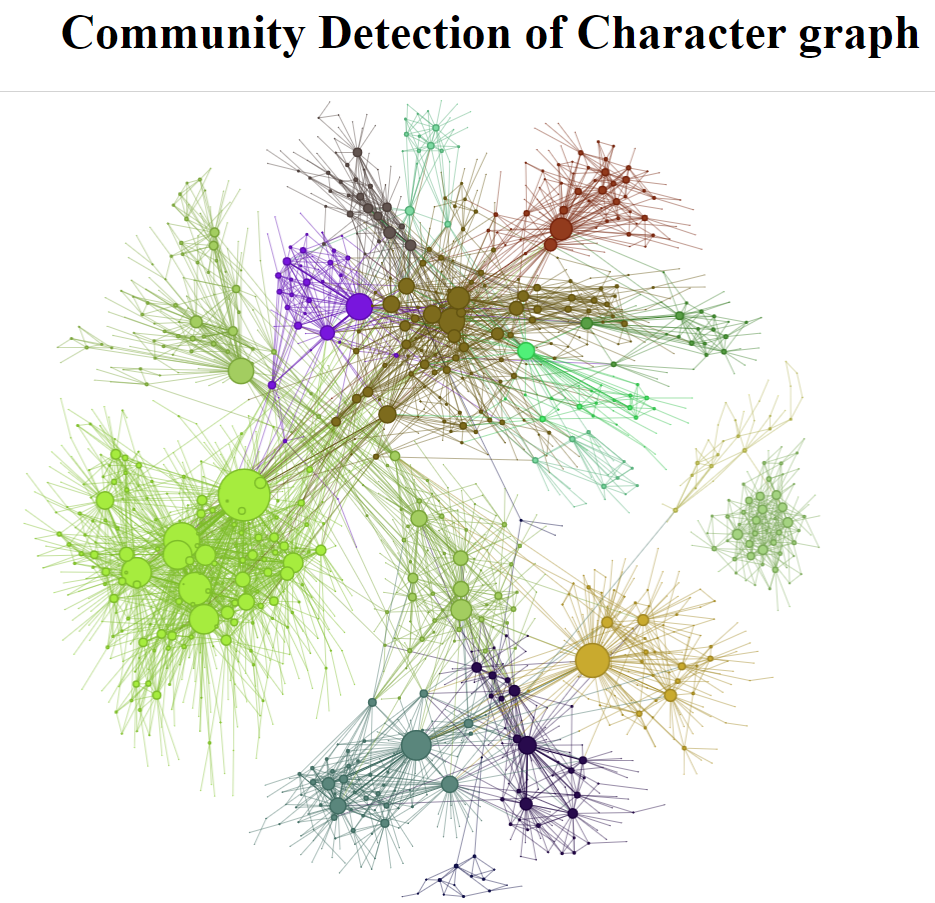

The community detection creates a clear distinction between the characters with few overlapping communities, which are assumed to be characters within the infinity saga. When zooming in on specific communities such as community 2 (large and light green) it can be seen that many of the characters come from the tv-series “Agents of Shield”. The same goes for other communities where one main character is present followed by the secondary characters from the respective tv-serie, e.g. Luke Cage in community 1. This character is a large and influential part of that community which is explained by the fact that he is the main character of the tv-series Luke cage. 

Next the community distiribution is visualised to see how the characters are distirbuted in the communities. 

In [104]:
# Create plot to visialise the distribution of the characters within each community
no_communities = len(set(partition_U_GCC.values()))
com=np.arange(0,no_communities)
val=list(Counter(partition_U_GCC.values()).values())
df_com_plot = pd.DataFrame({'communities':com,'number_of_characters': val, 'color': colors})

# plot visualisation
df = px.data.tips()
fig = px.bar(df_com_plot, x='communities', y='number_of_characters',
             color = 'number_of_characters',
             width=1500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title="Total count of characters in each community",
             labels={"Count": "communities"})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=600,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Communities"
))
fig.show()
fig.write_html("output_from_explainer_notebook/community_distribution.html")

Community 2 is the largest community and community 12 is the smallest.  Next step is to look into how the communities were gathered through some potential common characteristics.

### Analysis of common characteristics in communities <a name="community_common"></a> 
Next step is to explore the communities more in-depth by investigating the common characteristics using the attributes of a character such as movies, tv-series and teams that a character has been part of. This will hopefully provide a larger understanding of how the charaters has been seperated into the communities. 

* Find common characteristics of communities
    * Common movies
    * Common tv-series
    * Common teams
  


Create a dataframe with communities

In [105]:
# Update dataframe with communities
df_characters_com = df_characters[df_characters["name"].isin(list(partition_U_GCC.keys()))].copy()
df_characters_com["Community"] = partition_U_GCC.values()

Create a dictionary of communities with characters in each community. The communites are the keys, while the characters are the values. 

In [106]:
# dictionary of communities with characters in each community
dict_community = df_characters_com.groupby('Community').apply(lambda f: f['name'].values.tolist()).to_dict()

Create dictionary that counts how many characters that are in the same movie, tv-serie, team or specie in each community. This is done in order to investigate the common characteristics within a community. 

In [107]:
# count what movies/tv.series/teams the characters in the community appears in (and how many)
count_info_dict ={}
count_info_dict_movies ={}
count_info_dict_tv ={}
count_info_dict_teams ={}
count_info_dict_specie ={}
for com, char in dict_community.items():
    m_list = []
    t_list = []
    sp_list = []
    team_list = []
    m_counter = {}
    for ch in char:
        for movie in U_GCC.nodes[ch]['movies']:
            m_list.append(movie)
        for tv in U_GCC.nodes[ch]['tv-serie']:
            t_list.append(tv)
        for team in U_GCC.nodes[ch]['Team(s)']:
            team_list.append(team)
        sp_list.append(U_GCC.nodes[ch]['specie'])
    count_info_dict[com] = {'movies': {i:m_list.count(i) for i in m_list}, 
                            'tv-serie':{i:t_list.count(i) for i in t_list},
                            'teams': {i:team_list.count(i) for i in team_list}}
    count_info_dict_movies[com] = {i:m_list.count(i) for i in m_list}
    count_info_dict_tv[com] = {i:t_list.count(i) for i in t_list}
    count_info_dict_teams[com] = {i:team_list.count(i) for i in team_list}
    count_info_dict_specie[com] = {i:sp_list.count(i) for i in sp_list}
    

**Common characteristics for movies**

Visualise the common characteristics for the movies in each community

In [108]:
df_com_movies = pd.concat({k: pd.Series(v) for k, v in count_info_dict_movies.items()}).reset_index()
df_com_movies = df_com_movies.rename(columns={"level_0": "community", "level_1": "movie", 0: "count"})
df_com_movies = df_com_movies[df_com_movies['count']>1]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



In [109]:
df = px.data.tips()
fig = px.bar(df_com_movies, x="community", y="count",
             color='movie', barmode='group',
             width=800, height=300, color_discrete_sequence=px.colors.qualitative.Light24, 
             title="Total count of movies per community",
             labels={"Count": "Count of movies"})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Movies"
))
fig.write_html("output_from_explainer_notebook/movies_pr_community.html")
fig.show()

The distribution of the character’s movies within each community, shows some clear patterns. First of all it is noticed that characters within community 0 appear in a lot of different movies, which indicates that the characters within this community are characters within the infinity saga. Secondly it is noticed that communities such as 1 and 4 do not have any characters that are associated with the movies, which might indicate that these communities have other common characteristics such as tv-series or teams. Community 3 has mainly characters that are in the Guardian of the Galaxy movies. This tells us that the characters within this community differentiate from the rest of the infinity saga according to the algorithm, as they are in a separate community. This makes sense as the Guardian of the Galaxy movies are mainly located in outer space, dealing with different problems than e.g. Iron Man and Captain America whose movie plots are more overlapping and located on the earth. The same conclusion can be drawn for the characters within Thor who belong to their own community (community 6) as they mainly deal with the asgardians and midgaard when not appearing in Avengers. 

**Common characteristics for tv-series**

Visualise the common characteristcs for the tv-series in each community. 

In [110]:
df_com_tv= pd.concat({k: pd.Series(v) for k, v in count_info_dict_tv.items()}).reset_index()
df_com_tv = df_com_tv.rename(columns={"level_0": "community", "level_1": "tv-serie", 0: "count"})
df_com_tv = df_com_tv[df_com_tv['count']>1]

df = px.data.tips()
fig = px.bar(df_com_tv, x="community", y="count",
             color='tv-serie', barmode='group',
             width=1500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title="Total count of tv-series per community",
             labels={"Count": "Count of tv-series"})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Tv-series"
))
fig.write_html("output_from_explainer_notebook/tv_pr_community.html")
fig.show()


It is interesting to see if tv-series actually plays a role when separating the characters into communities, as first interpreted when hovering over the community graph. It can be seen that especially community 2 has the Agents of Shield tv-series as a common characteristic and community 9 has The runaways TV-serie as a common characteristic. When hovering over the graph it can be seen that these characters do not appear in other tv-series. This indicates that tv-series indeed has contributed to the division of the characters' communities. Community 0 has a lot of characters from different tv-series and from the movie distribution plot it was discovered that the same characters were connected to several movies as well. 

**Visualise the common teams wihtin each community**

In [111]:
df_com_teams = pd.concat({k: pd.Series(v) for k, v in count_info_dict_teams.items()}).reset_index()
df_com_teams = df_com_teams.rename(columns={"level_0": "community", "level_1": "teams", 0: "count"})
df_com_teams = df_com_teams[df_com_teams['count']>1]

df = px.data.tips()
fig = px.bar(df_com_teams, x="community", y="count",
             color='teams', barmode='group',
             width=1500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title="Total count of teams per community",
             labels={"Count": "Count of teams"})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Teams"
))
fig.write_html("output_from_explainer_notebook/teams_pr_community.html")
fig.show()


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.



It is interesting to see if the communities are divided through character teams. The scale is quite small as not all characters are associated with a team. It seems that the majority of the characters within the Avengers team are in community 0, however, a few are in community 3, 10 and 14.  These characters are amongst others Spider-Man, Thor, Star Lord and Doctor Strange, which makes good sense as they are a part of different storylines when not appearing in The Avengers movie. Doctor Strange, for instance, is a part of the Guardians of the Multiverse team next to The Avengers, Star Lord is a part of the Guardians of the Galaxy team and Spider-Man has created his own community with high school friends and enemies such as Mysterio. 

### Common characteristics using TF, IDF and TF_IDF <a name="community_tf_IDF"></a> 

After having investigated the common characteristics within each community, it could be interesting to look into the more general content of the characters' pages within each community. The purpose of this is to investigate if certain themes can seperate and describe a community.

This is done using TF-IDF, which is a technique used to identify the important words within a text.



**Get community tokens** <br>
First we will get all tokens for each community using the function get_community_tokens, defined in the begining of this section. This returns a dictionary with the preprocessed tokens for each community. In this all names, headers, stopwords and symbols are removed such that only relevant text is used. 

In [112]:
clean_tokens_dict = get_community_tokens(dict_community, characters_raw_text)

**Compute TF_IDF score for each community**<br>
Next the TF_IDF score is computed for each community in order to examine common characteristics for the commmunities more in-depth. It could be interesting to investigate if the community have some important words that defined the community, e.g. if the majority for a community's important words are defined by location. One might assume that if the characters from Guardians and Galaxy were gathered in one community, then galaxy would be an important word for that community.

In [ ]:
tf, idf, tf_idf = Compute_tf_IDF(clean_tokens_dict)

**Find top 5 communities and top 5 words**

In [116]:
com=np.arange(0,no_communities)
top_five_communities = sorted(com, key=lambda x: val[x], reverse=True)[:5]
# top 5 dictionary of communities
dict_community_top5 = dict((k, dict_community[k]) for k in top_five_communities if k in dict_community)

In [117]:
def getTop5(dict_):
    '''
    Function that returns the top 5 items from dictionary based on the values
    '''
    top5 = sorted(dict_.items(), key=lambda item: item[1], reverse = True)[0:5]
    return top5 

In [118]:
# Save results as dataframe
df_tf = pd.DataFrame()
df_tf_idf = pd.DataFrame() 

for com, tokens in tf.items(): 
    # TF
    df_tf["Community " +str(com)] = getTop5(tf[com])
for com, tokens in tf_idf.items(): 
    # TF
    df_tf_idf["Community " +str(com)] = getTop5(tf_idf[com])

In [119]:
print("Term frequency: ")
cols = ["Community "+ str(i) for i in top_five_communities]
display(df_tf[cols])
print("\nTF-IDF: ")
display(df_tf_idf[cols])

Term frequency: 


Community 2                         Community 4  \
0    (would, 0.008638696742906926)     (murdock, 0.018111890481515368)   
1  (simmons, 0.008084476587347405)      (nelson, 0.008903459726881502)   
2     (fitz, 0.007717095802412117)  (poindexter, 0.008793331300193148)   
3        (may, 0.0069130567130966)       (would, 0.008327403341127037)   
4    (could, 0.006665337098111662)        (told, 0.007683575615872048)   

                      Community 3                        Community 5  \
0     (man, 0.016992257103055044)  (sallinger, 0.011699314178134385)   
1  (parker, 0.013007418926361486)    (hogarth, 0.011071764758617599)   
2   (stark, 0.007750996209544173)      (would, 0.008315029808597427)   
3     (would, 0.0050620403667347)        (aka, 0.007384911918956475)   
4    (iron, 0.004932452133346292)    (ducasse, 0.005726388453090681)   

                      Community 6  
0  (castle, 0.031384853989703525)  
1   (madani, 0.01357784463384337)  
2   (would, 0.010447257505151826)  
3   (hoyle, 0.008946586152178127)  
4   (bendix, 0.00805623568438512)


TF-IDF: 


Community 2                        Community 4  \
0  (simmons, 0.016289436295349506)  (poindexter, 0.01771770979738801)   
1     (fitz, 0.015549199642094206)     (murdock, 0.01659575738493226)   
2     (enzie, 0.01106881302741921)      (nadeem, 0.01019024349618559)   
3     (shaw, 0.007227088968492459)   (marianna, 0.007757871405365822)   
4     (skye, 0.005846475883745494)     (lantom, 0.006928189156016972)   

                      Community 3                        Community 5  \
0  (parker, 0.014290110276354878)  (sallinger, 0.023572983475795915)   
1   (wenwu, 0.007084428475038178)    (hogarth, 0.014634169728613247)   
2   (shang, 0.005383563820870861)     (gelden, 0.013109929701870936)   
3    (beck, 0.004718765382942498)       (costa, 0.01097363023873258)   
4   (hogan, 0.003819332202215889)    (ducasse, 0.009216266677729002)   

                      Community 6  
0  (madani, 0.021852697922847424)  
1  (bendix, 0.021816690665225926)  
2   (hoyle, 0.018026503461565306)  
3  (castle, 0.016032187616094845)  
4  (dumont, 0.011877816486312292)

The results from the table do not indicate that communities can be seperated by specific themes from the character pages. The important words detected using the method for community 3 are for instance 'Parker', 'Wenwu' and 'Shang' which refer to character names, however these do not indicate a common theme for the community. Overall the method has not provided any usefull information for the analysis.



## Sentiment analysis on movie manuscript  <a name="sentiment_analysis"></a>

In this section the development of the main characters over time is investigated through a sentiment analysis of the movie manuscripts from the infinity saga collected from Kaggle. It was decided to investigate the movies from the infity saga as the network analysis showed that the characters within these movies were difficult to seperate from each other. The movie manuscripts are used in order to understand the main characters and movies better and through a sentiment analysis it will be investigated if the associated sentiments reflect certain events or character characteristics. In addition to this the analysis will be used in order to capture potential temporal changes within the characters and storylines.

VADER is used to associate characters with a sentiment score and as the method uses whole sentences it is able to capture words in specific contexts. This enables the method to produce more accurate sentiment scores compared to other methods using single words. The VADER method is rule-based and has a predefined word list which is used to classify how much of a text falls within a positive, negative or neutral sentiment from certain threshold. VADER return the fraction of negative, neutral and positive sentiments in a text and computes an overall score (compound score) by normalizing these values which means that the compound scores ranges from -1 to 1. 


Following are investigated
* Average sentiment score for each character
* Sentiment score for each character for each movie
* Sentiment score for each character by phase
* Average sentiment for each movie by phase



The data has been preprocessed beforehand and then loaded in. There are following dataset contains
* lines
* word count
* characters 
* movies

Load data that are relevant for the sentiment analysis. The data preprocssing is explained in the beginning of the notebook, and more information can be found in the "data preprocessing" notebook.

In [122]:
# Load data specific for sentiment analysis
mcu = pd.read_csv("./data_to_sentiment/mcu_scripts.csv")
movies = pd.read_csv("./data_to_sentiment/movies_information.csv")
characters = pd.read_csv("./data_to_sentiment/characters_information.csv")

file_to_read_movies = open("./data_to_sentiment/df_movies.pickle", "rb")
df_movies = pickle.load(file_to_read_movies)
file_to_read_movies.close()
mcu = mcu.drop(columns=['Unnamed: 0'])

After having imported the relevant data the dataframes we need to clean it such that it is aligned with the data from fandom (the movie and character dataframes). This includes uppercasing character names in the character dataframe and merging the movie dataframe with the information from the manuscripts such that each movie are assigned the same phase. Only movies with a manuscripts are considered in the forthcoming analysis.  

In [123]:
df_movies['movies'] = df_movies['movies'].str.replace(r' \(film\)', '')
movies = movies.drop(columns=['Unnamed: 0'])
df_movies = df_movies.drop(columns=['_movies'])
df_movies_merges = movies.merge(df_movies, left_on='movie', right_on='movies', suffixes=(False, False))

df_characters['name'] = df_characters['name'].str.upper()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [124]:
def get_phase_no(column):
    if column == 'Phase_One_Movies':
        return 1
    if column == 'Phase_Two_Movies':
        return 2
    if column == 'Phase_Three_Movies':
        return 3
df_movies_merges['Phase_no'] = df_movies_merges['Phase'].apply(get_phase_no)
df_movies_merges.sort_values('Phase_no',inplace=True, ascending=True)

Below the MCU-dataframe is seen. It can be seen that the dataframe containes a column with the character and the line within the respective movie. The movie name can be seen in the movie column along with the release year, wordcount and phase number. This is the original dataframe when refering to the mcu dataframe in the following analysis. 

In [125]:
mcu = pd.merge(mcu,df_movies_merges[['movie','Phase_no','Phase']],on='movie', how='left')
mcu.sort_values('year',inplace=True, ascending=True)
mcu.head(10)

character                                               line  \
0       TONY STARK  Oh, I get it.  You guys aren’t allowed to talk...   
454     TONY STARK  Come with me. I made some promises I’m not goi...   
455  OBADIAH STANE  Is this like a tick for you? Whenever you have...   
456     TONY STARK  Wait a minute.  I got to ask you something.   ...   
457  OBADIAH STANE  Are you out of your mind.  You’re messing with...   
458     TONY STARK            I’m not worried about that right now --   
459  OBADIAH STANE  -- you should be.  You’ll disappear.  I can’t ...   
460     TONY STARK  -- naive?  I was naive before, when I was grow...   
461  OBADIAH STANE                       -- Tony, you’re a child --!    
462     TONY STARK  -- you don’t believe I can turn this company a...   

        movie  year  word_count  Phase_no             Phase  
0    Iron Man  2008          22         1  Phase_One_Movies  
454  Iron Man  2008          29         1  Phase_One_Movies  
455  Iron Man  2008          39         1  Phase_One_Movies  
456  Iron Man  2008          59         1  Phase_One_Movies  
457  Iron Man  2008          26         1  Phase_One_Movies  
458  Iron Man  2008           8         1  Phase_One_Movies  
459  Iron Man  2008          26         1  Phase_One_Movies  
460  Iron Man  2008          48         1  Phase_One_Movies  
461  Iron Man  2008           7         1  Phase_One_Movies  
462  Iron Man  2008          14         1  Phase_One_Movies


### Calculation of sentiment score  <a name="sentiment_calculation"></a>
Next the sentiment scores are calculated using Vaders. A function is created to compute the sentiment for each sentence which can be seen below. 

In [126]:
# define sentiment score analyser
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

def get_vader_sentiment_score(text):
    '''
    Input: all the sentences said by the character
    Output: average sentiment score for the character
    '''
    # allocate space 
    sentiments = []
    
    # compute the compound score for each sentence said by the character
    for sentence in text:
        sentiments.append(analyzer.polarity_scores(sentence)['compound'])
    
    # calculate the average sentiment scores
    return np.mean(sentiments)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/katinkaklepsch/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### Sentiment score for each character  <a name="sentiment_calculation_character"></a>
A sentiment score for each character in each movie is computed to see the temporal gaps, and examine how the characters sentiment change over time and over phases. It could be interesting to see if the sentiment is more negative in movies where there are a distruction e.g. in infinity war. 

The results are saved in a dictionary for each charater and movie. 

In [127]:
# Create a multi key dictionary for each character with all the lines
dict_characters =  mcu.groupby(['movie', 'character']).apply(lambda f: f['line'].values.tolist()).to_dict() 

**Caculate sentiment score**<br>
After having created a dictionary for each character in each movie, it is possible to compute the sentiment score. This is done in the followig section.

In [129]:
# calculate the sentiment score for each characters dialog for each movie
sentiment_characters_dict = {name: get_vader_sentiment_score(dict_characters[name]) 
                        for name in list(dict_characters.keys())}

The sentiment score is added to the MCU-dataframe using the mapping function.

In [130]:
# Add the sentiment score to the mcu dataframe
mcu['sentiment_characters'] = mcu.set_index(['movie', 'character']).index.map(sentiment_characters_dict.get)

Next dataframes with the sentiment scores are computes in order to get more into the sentiment score for each character grouped by phase, movie etc. 

In [132]:
# Create a dataframe with sentimentscore
characters_sentiment = pd.DataFrame(mcu.groupby(["movie",'year',"character",'Phase_no', 'Phase'])["sentiment_characters",'word_count'].agg(['mean','std']))
characters_sentiment.reset_index(inplace=True)
characters_sentiment.columns = list(map('_'.join, characters_sentiment.columns.values))
characters_sentiment = characters_sentiment.sort_values('year_',ascending=True)

# Create a dataframe with sentimentscore grouped by phase
characters_sentiment_phase = pd.DataFrame(characters_sentiment.groupby(["Phase_no_",'Phase_',"character_", 'year_'])["sentiment_characters_mean"].agg(['mean','std']))
characters_sentiment_phase.reset_index(inplace=True)


# Change to pivot table with characters as rows and movies as columns
characters_sentiment_PV = characters_sentiment.pivot(index="character_", columns=["Phase_no_","movie_"], values="sentiment_characters_mean")
characters_sentiment_PV.fillna(0, inplace=True)


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



#### Sentiment score of main characters for each movie  <a name="sentiment_main_calculation_character"></a>
As there are many characters, we have decided to only focus on the main characters sentimment for each movie separetly.

The sentiment across movies is highly dependent on the sentiment of the characters and therefore the sentiment analysis is mainly based on the temporal development of the main characters within the infinity saga movies. The characters are referenced to by their true name in the following in order to avoid confusion as some of the hero names are exactly the same as the movie name.

* Objective: See if the sentiment score of the main characters change depending on which phase they are in. 

In [134]:
main_characters = ['TONY STARK', 'STEVE ROGERS', 'NATASHA ROMANOFF', 'THOR', 'NICK FURY', 'PEPPER POTTS', 
                   'BRUCE BANNER', 'JAMES RHODES', 'LOKI', 'PETER PARKER', 'SCOTT LANG', 'THANOS', 'PETER QUILL', 'PHIL COULSON']

characters_sentiment_main = characters_sentiment[characters_sentiment['character_'].isin(main_characters)].copy()
characters_sentiment_main = characters_sentiment_main.sort_values('year_',ascending=True)

characters_sentiment_phase_main = characters_sentiment_phase[characters_sentiment_phase['character_'].isin(main_characters)].copy()
characters_sentiment_phase_main = characters_sentiment_phase_main.sort_values('year_',ascending=True)



**Average sentiment score for each character** <br>
The average sentiment score are computed for each character in order to get an overall view of the characters sentiment score. The average sentiment score is based on all the movies a main character has appeared in. 

In [136]:
avg_characters_sentiment = characters_sentiment.groupby(['character_'], as_index=False)['sentiment_characters_mean'].mean()

avg_characters_sentiment_main = avg_characters_sentiment[avg_characters_sentiment['character_'].isin(main_characters)].copy()

The average sentiment score is visualised along with the overall average sentiment score

In [137]:
mean = avg_characters_sentiment_main['sentiment_characters_mean'].mean()
y = avg_characters_sentiment_main['character_']
df = px.data.tips()
fig = px.bar(avg_characters_sentiment_main, 
             x="character_", y="sentiment_characters_mean",
             color = "character_",
             width=500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title='Average sentiment score by character',
             labels={"Count": "Phase", 'character_': 'Characters', 'sentiment_characters_mean': 'Average sentiment score'})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Characters"
))
fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=-.5,
            y0=mean,
            x1=len(y)-.5,
            y1=mean,
            line=dict(
                color="Orange",
                width=4,
                dash="dash",
            ),
    ))
fig.write_html("output_from_explainer_notebook/sentiment_character_average_score_character.html")
fig.show()

Looking at the average sentiment for the main characters it observed that Iron Man, Black Widow and Spider-Man are the characters with the highest average sentiment, while Peter Quill (Star-lord), James Rhodes (War Machine), Thor and Steve Redges (The current Captain America) is below average.

However as the the characters' sentiments are not static, it is relevant to look more into the temporal developmen fo the characters sentiment. 


**Sentiment score by character colored after the movie they appear in** <br>
In the plot below it is seen that the characters' sentiment changes over time and within each movie which is listed chronologically after release year.

In [138]:
df = px.data.tips()
fig = px.bar(characters_sentiment_main, x="character_", y="sentiment_characters_mean",
             color='movie_', barmode='group',
             width=1500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title='Sentiment score by character colored by movie',
             labels={"Count": "movies", 'character_': 'Characters', 'sentiment_characters_mean': 'Average sentiment score'})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Movies"
))

fig.write_html("output_from_explainer_notebook/sentiment_scor_by_charater_color_movie.html")
fig.show()

The figure above illustrates each characters sentiment for each movie. From this visualisation it is more clear that Thor has the most negative sentiments in most movies, and James Rhodes has the largest negative sentiment in Captain marvel. Moreover Peter Quill has a general negative sentiment in both Avenger movies (see webpage for more in-depth interpretations).

Below the mean and standard deviation are visualised


In [139]:
characters_sentiment_main.groupby('movie_')['sentiment_characters_mean'].agg(['mean', 'std'])

mean       std
movie_                                                 
Ant-Man                              0.030649  0.053086
Avengers: Age of Ultron              0.087661  0.067660
Avengers: Endgame                    0.017274  0.077367
Avengers: Infinity War               0.016395  0.053804
Captain America: Civil War           0.074910  0.030838
Captain America: The First Avenger   0.116359  0.143601
Captain America: The Winter Soldier  0.036465  0.034869
Captain Marvel                      -0.056785  0.216315
Guardians of the Galaxy Vol. 2       0.002108       NaN
Iron Man                             0.057984  0.056011
Iron Man 2                           0.077189  0.037439
Iron Man 3                           0.071200  0.013638
Spider-Man: Homecoming               0.082316  0.058874
The Avengers                         0.023840  0.051149
Thor                                -0.015304  0.059391
Thor: Ragnarok                       0.234366  0.378133
Thor: The Dark World                 0.075135  0.061435

As the Infinity Saga is divided into phases, the developments of the characters' sentiments across phases are interesting to investigate. In phase 3 everything collides and thus it is assumed that the sentiment within this phase is more negative compared to the other phases. 

In [140]:
df = px.data.tips()
fig = px.bar(characters_sentiment_phase_main, x="character_", y="mean",
             color='Phase_', barmode='group',
             width=1500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title='Sentiment score by character colored by phase',
             labels={"Count": "Phase", 'character_': 'Characters', 'mean': 'Average sentiment score'})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Phase"
))
fig.write_html("output_from_explainer_notebook/sentiment_scor_by_charater_color_phase.html")
fig.show()

When observing all character’s sentiment scores, it does not seem to be a trend that the sentiment score is lower in phase 3 which was assumed. For some characters, however, the sentiment is more negative e.g. for War Machine, Pepper Potts, Thor and Loki. 
Natasha Romanoff seems to have a high sentiment in phase 3, however this is due to her extremely high sentiment score from the movie Thor Ragnarok as mentioned earlier. When observing her sentiment scores for the other movies in phase 3, they are all low compared to the sentiment scores from the movies in phase 1 and 2.


Below the standard deviation and average for the sentiment score for each phase can be seen

In [141]:
characters_sentiment_phase_main.groupby('Phase_no_')['mean'].agg(['mean', 'std'])

mean       std
Phase_no_                    
1          0.045685  0.064951
2          0.072227  0.053248
3          0.047587  0.141320

It can be seen that the average sentiment in phase 3 are less than the sentiment in phase 2. However there are no clear indication that the sentiment has changed to a more negative sentiment from the begining of the infiinity saga to the end of the infinity saga. 

To see if the the most happiest and saddest characters according to the vader sentiment score are any of the main characters these are found. 

In [142]:
df_happy_sad = pd.DataFrame(characters_sentiment.groupby('character_')['sentiment_characters_mean'].mean())



In [143]:
sorted_index_happy=(-df_happy_sad['sentiment_characters_mean']).argsort()[:10]
sorted_index_sad=(df_happy_sad['sentiment_characters_mean']).argsort()[:10]
df_10_happy = df_happy_sad.iloc[sorted_index_happy, :]
df_10_sad = df_happy_sad.iloc[sorted_index_sad, :]


In [144]:
df_10_happy

sentiment_characters_mean
character_                                
MAC GARGAN                          0.8927
EXPO ANNOUNCER                      0.8860
THOR/SELVIG                         0.8613
GAMORA'S MOTHER                     0.7003
PERSON                              0.7003
ZEMO'S WIFE                         0.6782
BAILIFF                             0.6757
NEWS ANCHOR #3                      0.6705
WOMAN IN CROWD                      0.6696
RANDOM WOMAN                        0.6696

In [145]:
df_10_sad

sentiment_characters_mean
character_                                       
TV REPORTER’S VOICE                     -0.981100
BBC ANCHOR                              -0.952700
ASGARDIAN PA                            -0.929900
CADETS                                  -0.851100
SOVEREIGN PILOT                         -0.831300
ACTOR ODIN                              -0.816600
ADMIRAL                                 -0.734633
PUSHY TABLOID REPORTER                  -0.717700
SMITHSONIAN GUARD                       -0.710300
JOSEPH DANVERS                          -0.708800

It can be seen that the characters are mainly unknown character probably only with few lines, thus the sentiment score is only based on few words and thereby not as relevant as a sentiment score for a main character.

#### The development of Thor  <a name="sentiment_calculation_Thor"></a>
As Thor's sentiment varied a lot, his sentiment score and his development along the timeline is investigated further. Below a plot for his sentiment score is visualised.

In [146]:

mean = characters_sentiment_main[characters_sentiment_main['character_']=='THOR']["sentiment_characters_mean"].mean()
y = characters_sentiment_main[characters_sentiment_main['character_']=='THOR']['movie_']

df = px.data.tips()
fig = px.bar(characters_sentiment_main[characters_sentiment_main['character_']=='THOR'], 
             x="movie_", y="sentiment_characters_mean",
             color='Phase_', barmode='group',
             width=500, height=400, color_discrete_sequence=px.colors.qualitative.Light24, 
             title='Sentiment score of Thor colored by phase',
             labels={"Count": "Phase_no"})
fig.update_xaxes(showticklabels=True ) 
fig.update_layout(width=1000,height=500,xaxis=dict(type = "category") )
fig.update_layout(legend=dict(
    title = "Phase"
))
fig.add_shape(
        go.layout.Shape(
            type="line",
            x0=-.5,
            y0=mean,
            x1=len(y)-.5,
            y1=mean,
            line=dict(
                color="Orange",
                width=4,
                dash="dash",
            ),
    ))
fig.write_html("output_from_explainer_notebook/sentiment_thor_development_2.html")
fig.show()



When looking into the sentiment of thor it can be seen that his first movie Thor, The Avengers and Avengers : infinity war are the movies where he has a negative sentiment. When having watched the movies this makes sense e.g. Thor is because he's been banished from Asgard and betrayed by his brother. In avengers infinity war Thor has a depression, which obviously reflects his lines in the movie. 

### Sentiment score for each movie <a name="sentiment_calculation_movie"></a>
After having investigated the main characters' sentiment and their temporal development, it could also be interesting to examine if the sentiment of the movies follows the same patterns. The figure below illustrates the average sentiment of the individual movies, colored by the phase they appear in. 

First a dictionary for the lines within each movie is created

In [147]:
# Compute sentiment score for movie
dict_movies = mcu.groupby('movie').apply(lambda f: f['line'].values.tolist()).to_dict() 

Next the sentiment score for each movie is computed using the vader_sentiment function. The results are concatenated in a dictionary.  

In [149]:
# calculate the sentiment score for each characters dialog for each movie
sentiment_movies_dict = {name: get_vader_sentiment_score(dict_movies[name]) 
                        for name in list(dict_movies.keys())}


# Add to dataframe
df_movies_merges['sentiment_movie_score'] = df_movies_merges['movie'].map(sentiment_movies_dict)

In [151]:
# Create dataframe
df_movies_merges_vader = mcu.groupby(['year','movie','Phase','Phase_no'])[["sentiment_characters",'word_count']]\
                .agg(['mean','std']).reset_index()
df_movies_merges_vader.columns = df_movies_merges_vader.columns.map('_'.join)

Next the sentiment score is visualised. First the sentimment score is visualised in respect to the movies wordcount, inorder to see if there are any coherence between the two values. 

In [152]:
trace1 = go.Bar(x=df_movies_merges_vader['movie_'],y=df_movies_merges_vader['word_count_mean'],
                name='word count',opacity=0.5)


trace2 = go.Scatter(x=df_movies_merges_vader['movie_'],y=df_movies_merges_vader['sentiment_characters_mean'], 
                    name='Avg. sentiment',
                    error_y=dict(type='data',
                                 array = df_movies_merges_vader['sentiment_characters_std'],visible=True),yaxis='y2')

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace1)
fig.add_trace(trace2,secondary_y=True)
fig['layout'].update(height = 500, width = 1000,xaxis=dict(tickangle=-90, title = "Movies"))
fig.update_layout(title_text="Average movie sentiment and average word count")
fig.write_html("output_from_explainer_notebook/sentiment_movie_average_wordcount.html")
fig.show()

From the figure it is not evident that the word count of a movie and the sentiment score afects one another. Therefor the sentiment score is visualiased along with the average and standard deviation color by phase. 



In [153]:
# Plot
fig = px.bar(df_movies_merges_vader, x='movie_', y='sentiment_characters_mean',error_y='sentiment_characters_std',
             title="Sentiment per for movies colored by phase",
             color='Phase_',
             color_discrete_sequence=px.colors.qualitative.Light24, 
             labels={"Phase_":"Phase","movie_":"Movies","sentiment_characters_mean":"Average sentiment"})

fig.update_layout(shapes=[dict(type= 'line',xref= 'paper', x0= 0, x1= 1,yref= 'y', 
                               y0= df_movies_merges_vader['sentiment_characters_mean'].mean(), 
                               y1= df_movies_merges_vader['sentiment_characters_mean'].mean(),
                               line=dict(color="magenta",width=1.5, dash='dot'))])
fig.write_html("output_from_explainer_notebook/sentiment_movie_std_mean_color_phase.html")
fig.show()

From the visualisation it is seen that the movies with the highest average sentiment scores are Iron Man and Spider-Man while the movies with the lowest sentiment score are Infinity war and The Guardians of the Galaxy. With knowledge of these movies, this is not a surprise.  Guardians of the Galaxy is a movie with a different tone in general than, for example, Iron Man. They are a team of multiplicity and the tone is sarcastic with a lot of swearing. However it can not be concluded that the movie is sad or very negative through the low sentiment score, as the sentiment calculation does not take irony and sarcasm into account. 

A hypothesis as to why Spider-Man stands out with the high sentiment score in phase 3, is that the movie deals with other problems compared to the other movies. The problems are more related to classical teenage issues such as high school, homecoming and homework. Furthermore, his age is a factor that affects his sentiment, as he is much younger than the other characters thus his lines must be different as they target a different segment. 


In [154]:
# Basic stats
df_movies_merges_phase = df_movies_merges_vader.groupby(['Phase_']).mean()
df_movies_merges_phase.head()

year_  Phase_no_  sentiment_characters_mean  \
Phase_                                                               
Phase_One_Movies    2010.400        1.0                   0.053390   
Phase_Three_Movies  2017.625        3.0                   0.034126   
Phase_Two_Movies    2014.000        2.0                   0.040800   

                    sentiment_characters_std  word_count_mean  word_count_std  
Phase_                                                                         
Phase_One_Movies                    0.089778        11.873025       15.408339  
Phase_Three_Movies                  0.093909        10.774089       13.654668  
Phase_Two_Movies                    0.089464        10.858623       13.569363

### NLP on movie manuscripts  <a name="NLP_manus"></a>
The next step in the analysis of the marvel movie manuscripts is to look more into the natural language preprocessing. We have chosen to look in to wordclouds of the main characters, with the main goal to see if the characters lines differ from eachother and if the word clouds can explain the different sentiment scores for the movies and for the characters. For instance it could be interesting to see what words are the most inmportant words for a character such as Thor whose sentiment variest quite a lot depending on the movie. 

At last it could be interesting to look into the more theoretical aspects of the NLP-analysis and look into similarity measures and Zipf's law in order to investigate how similar the characters lines are in general. 


Folllowing functions are used to compute tc_IDF score based on the manusscripts. 

In [155]:
#calculating TC for each word
def TC(text):
    '''
    This function computes TC for each word in the document 
    
    Input: A list of cleaned tokens
    Output: Count of each token in the document as a dictionary
    '''
    
    fdist = FreqDist(text)
    tc = {w: fdist[w] for w in set(text)}
    return tc

#calculating IDF for each word
def IDF(content):
    '''
    This function somputes idf for all words in content
    
    Input: A dictionary with the cleaned tokens for each document 
    Output: The IDF-score for each word
    
    '''
    vocab = set.union(*[set(words) for words in content.values()])
    idf_word= {}

    for word in vocab:
        count = 0
        for key in content:
            document = content[key]
            if word in document:
                count += 1
        idf_word[word] = math.log(len(content)/count)
    return idf_word



def TC_IDF(content, tcc, idf_word):
    '''
    computes tf_IDF/tc_IDF using the above functions. 
    Retunrs a dictionary where the TF_IDF is compuotes for each word.
    '''
    tc_idf = {}
    for c in content:
        tc_idf_c = {}
        for t, tc in tcc[c].items():
            tc_idf_c[t] = tc*idf_word[t]

        tc_idf[c] = tc_idf_c
    return tc_idf

In [156]:
def get_tokens_script(data, name):
    '''
    Input: 
        data = the dictionary of each characters' dialogue
        name = the name of the character
    Output: tokens and text concatenated
    
    '''

    text_string = ' '.join(data[name])
    
    # clean the text
    tokens = tokenize(text_string)
    
    return tokens

### Word Cloud of main characters using TC_IDF  <a name="word_clouds_sentiment"></a>
Following shows the word clouds for the main characters based on the tc idf score. 

First a dictionary is created based on the lines of the mcu dataframe only containing lines with the main characters. 

In [157]:
# create dictionary
mcu_subset = mcu[mcu['character'].isin(main_characters)]
dict_main_characters =  mcu_subset.groupby(['movie', 'character']).apply(lambda f: f['line'].values.
                                                                         tolist()).to_dict() 

Next the lines are tokenised using the function get_tokens_script described in the beggining of the section.

In [158]:
# get tokens for character dialouge
tokens_character_dialouge = {name: get_tokens_script(dict_main_characters, name) 
                             for name in list(dict_main_characters.keys())}

Next the TC_idf score is computed and saved as a dictionary. The dictionary has the movie as first key and the character as second key. The value is the tc_idf score.

In [159]:
# compute TC-IDF
TC_character = {c: TC(t) for c, t in tokens_character_dialouge.items()}
IDF_character = IDF(tokens_character_dialouge)
TC_IDF_character  = TC_IDF(tokens_character_dialouge, TC_character, IDF_character)

The wordclouds for the main characters are generated. The figures are saved in the folder images. 

In [161]:
mcu_subset = mcu[mcu['character'].isin(main_characters)]
dict_main_characters =  mcu_subset.groupby(['character']).apply(lambda f: f['line'].values.
                                                                         tolist()).to_dict() 
# get tokens for character dialouge
tokens_character_dialouge = {name: get_tokens_script(dict_main_characters, name) 
                             for name in list(dict_main_characters.keys())}

# compute TC-IDF
TC_character = {c: TC(t) for c, t in tokens_character_dialouge.items()}
IDF_character = IDF(tokens_character_dialouge)
TC_IDF_character  = TC_IDF(tokens_character_dialouge, TC_character, IDF_character)

In [164]:
def word_cloud(my_dict, title):
    # Set up mask
    Title = './data_to_analysis/'+title + '.png'
    Mask = np.array(Image.open(path.join(Title)))

    # Make word cloud (included parameter:)
    wordcloud = WordCloud(background_color="white",width = 1000, 
                          height = 500, max_words=100,relative_scaling=0.5, mask = Mask,
                          contour_width=1, contour_color='grey').generate_from_frequencies(my_dict)

    image_colors = ImageColorGenerator(Mask)

    # show
    fig, axes = plt.subplots(1,2,figsize=(15,8))
    axes[0].imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
    axes[1].imshow(Mask, cmap=plt.cm.gray, interpolation="bilinear")
    for ax in axes:
        ax.set_axis_off()
    plt.title(title, fontsize=20) 
    
    fig.savefig('output_from_explainer_notebook/word_cloud_sentimment_{}.png'.format(title))
    plt.show()

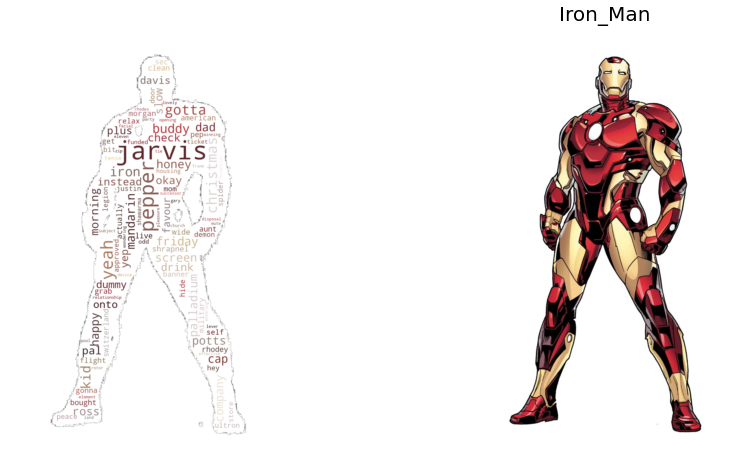

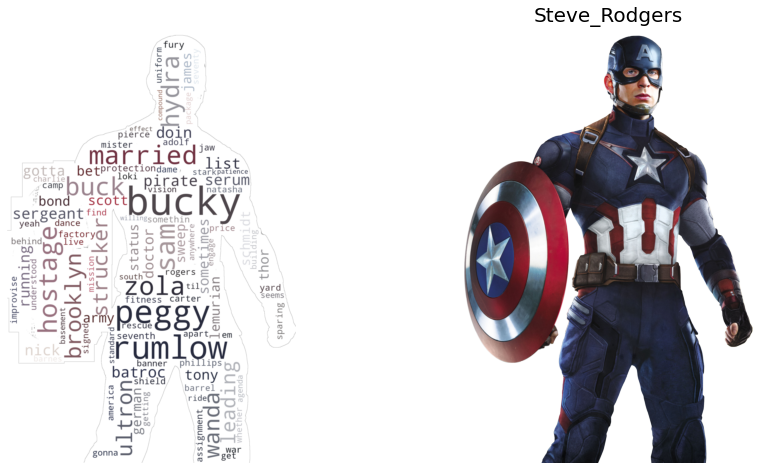

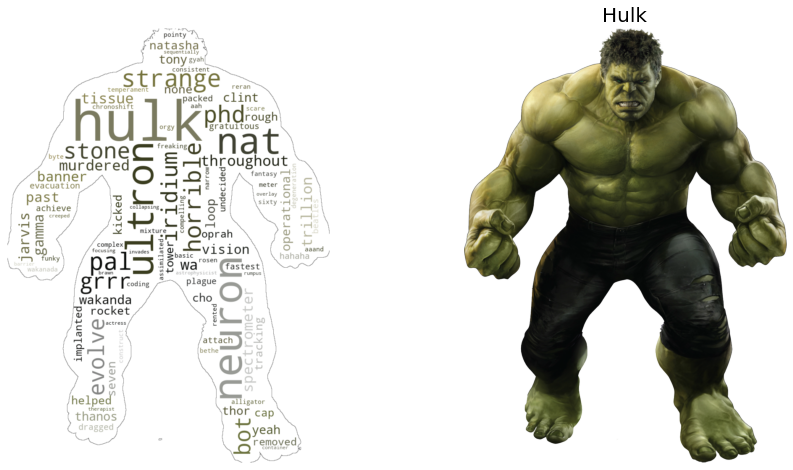

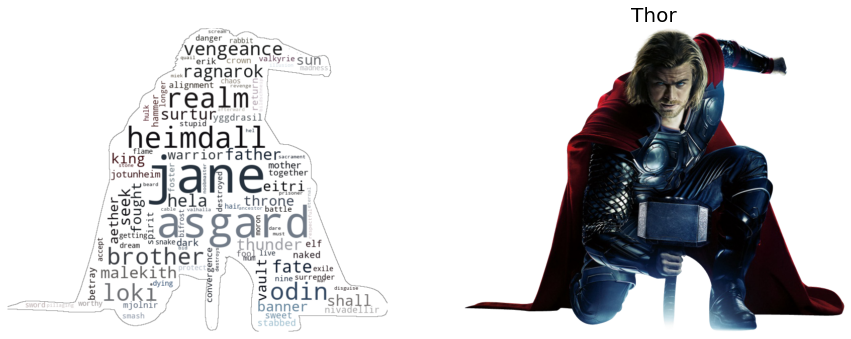

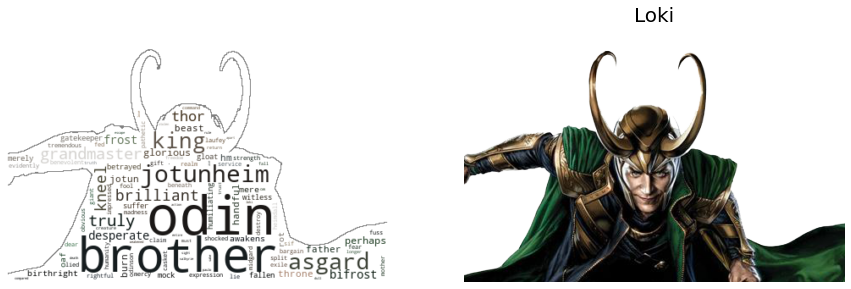

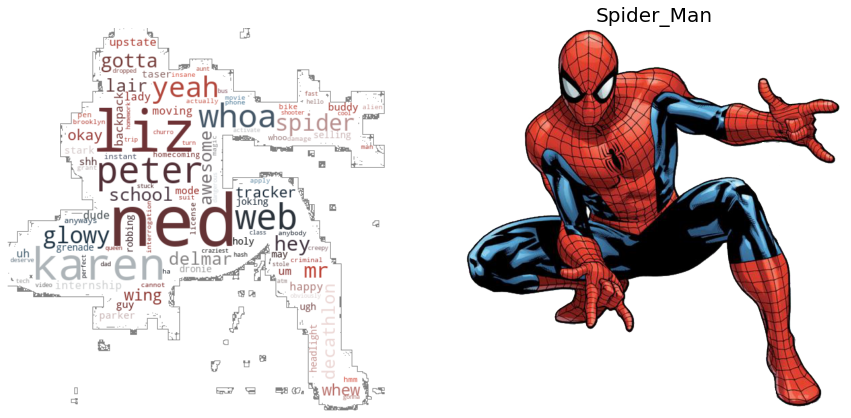

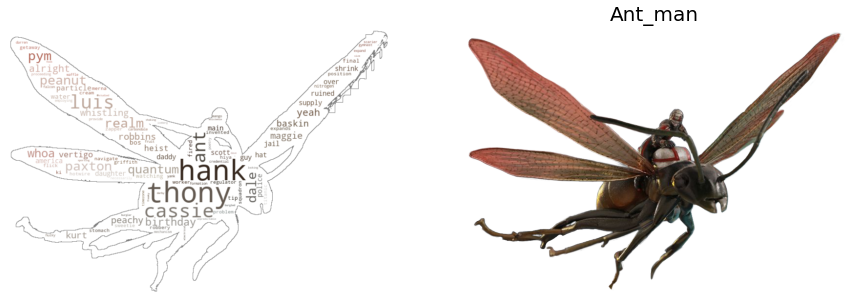

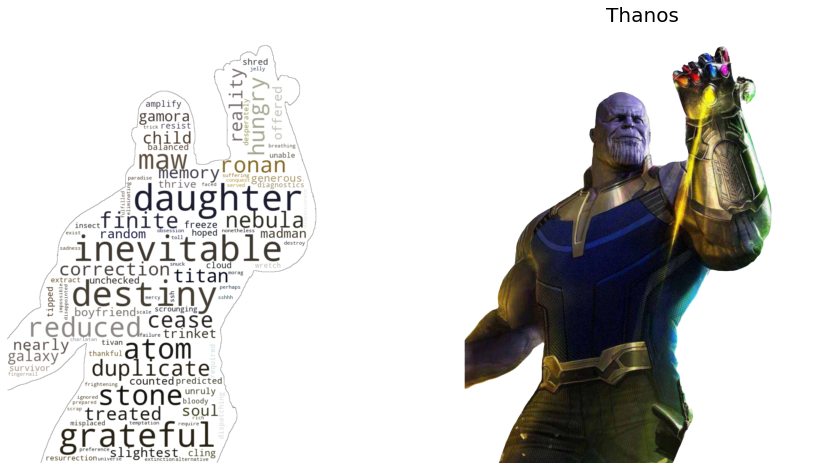

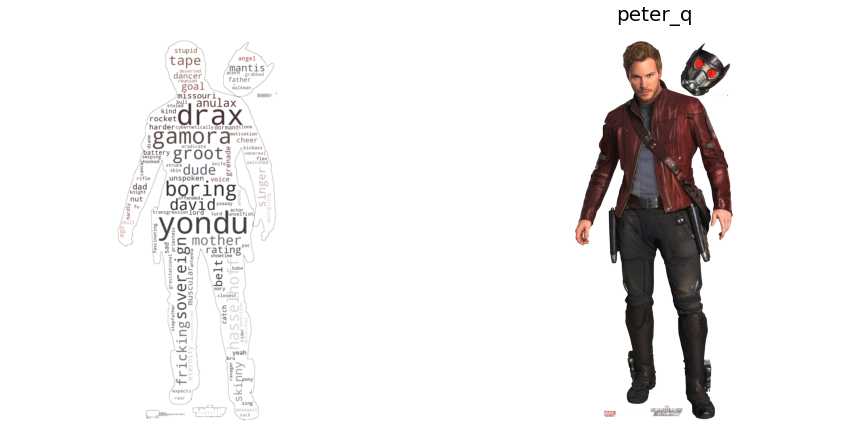

In [165]:
main_char_wordCloud = ['TONY STARK', 'STEVE ROGERS', 'BRUCE BANNER','THOR','LOKI','PETER PARKER',
 'SCOTT LANG','THANOS', 'PETER QUILL']
titles = ['Iron_Man', 'Steve_Rodgers', 'Hulk', 'Thor', 'Loki', 'Spider_Man', 'Ant_man', 'Thanos','peter_q']

for idx,char in enumerate(main_char_wordCloud):
    word_cloud(TC_IDF_character[char],titles[idx])

The word clouds shows some interesting results. For instance, they give a quite good explanation to why Iron-Man’s sentiment score is quite high while Thor’s is quite low. Iron Man's most important words are Pepper, honey, pal, kid and buddy while Thor's word clouds are dominated by words such as ragnarok, fate, thunder, dark, army, warrier

### Dispersion plot <a name="dispersion_plot"></a>


After having investigated the sentiment for each character, it could be interesting to look at a dispersion plot with a selection of words to see how much a word is used  through time, with the goal to see if there are some words that are more prominent in some phases compared to others. Words that we expect to have a larger influence in different phases are Loki, Stone, Tesseract. Then it would be interesting to look into other standard words such as love, war and enemy. 

First the movie names are extracted dependent on the phases in order to know when the phase changes to a new phase in the dispersion plot. 

In [ ]:
# Save the preprocesses movie scripts in a datafile
for movie, script in dict_movies.items():
    text_string = ' '.join(script)
    with open('movie_data/' + movie+'.txt', 'w') as f: # save the text for each character in the folder
        f.write(text_string)

In [166]:
# Select movie names in correct order after year and phase
file_name = [movie+'.txt' for movie in df_movies_merges['movies']] 
file_name = [w.replace(': ', '_') for w in file_name]
# Create corpus
corpus_all_movies = PlaintextCorpusReader(f'movie_data', file_name)
text_all_movies = nltk.Text(corpus_all_movies.words())

In [167]:
file_name_phase_1 = list(df_movies_merges[df_movies_merges['Phase']=='Phase_One_Movies']['movies'])
file_name_phase_2 = list(df_movies_merges[df_movies_merges['Phase']=='Phase_Two_Movies']['movies'])
file_name_phase_3 = list(df_movies_merges[df_movies_merges['Phase']=='Phase_Three_Movies']['movies'])

In [168]:
file_name_phase_1 = [w.replace(': ', '_') for w in file_name_phase_1]
file_name_phase_2 = [w.replace(': ', '_') for w in file_name_phase_2]
file_name_phase_3 = [w.replace(': ', '_') for w in file_name_phase_3]
file_name_phase_1 = [row + ".txt" for row in file_name_phase_1]
file_name_phase_2 = [row + ".txt" for row in file_name_phase_2]
file_name_phase_3 = [row + ".txt" for row in file_name_phase_3]

Next a corpus iis created using PlaintextCorpusReader and nltk.text

In [169]:
# Create corpus for each phase
corpus_phase_1 = PlaintextCorpusReader(f'movie_data', file_name_phase_1)
text_phase_1 = nltk.Text(corpus_phase_1.words())

corpus_phase_2 = PlaintextCorpusReader(f'movie_data', file_name_phase_2)
text_phase_2 = nltk.Text(corpus_phase_2.words())

corpus_phase_3 = PlaintextCorpusReader(f'movie_data', file_name_phase_3)
text_phase_3 = nltk.Text(corpus_phase_3.words())

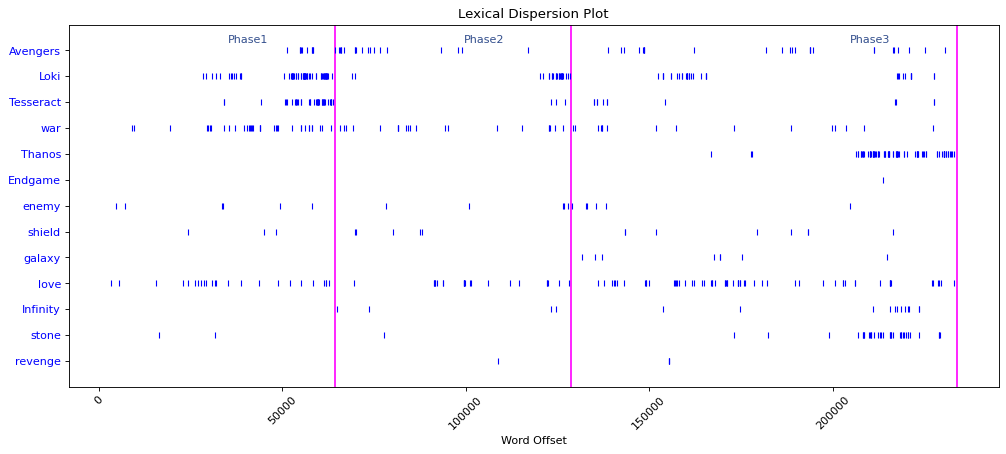

In [170]:
plt.figure(figsize=(15, 6), dpi=80)
plt.xticks(rotation=45) 
plt.axvline(len(text_phase_1), color="magenta")
plt.text(x=len(text_phase_1)-29000, y=12.3, s='Phase1', alpha=1, color='#334f8d')

plt.axvline(len(text_phase_1)+len(text_phase_2), color="magenta")
plt.text(x=len(text_phase_1)+len(text_phase_2)-29000, y=12.3, s='Phase2', alpha=1, color='#334f8d')

plt.axvline(len(text_phase_1)+len(text_phase_2)+len(text_phase_3), color="magenta")
plt.text(x=len(text_phase_1)+len(text_phase_2)+len(text_phase_3)-29000, y=12.3, s='Phase3', alpha=1, color='#334f8d')

text_all_movies.dispersion_plot(["Avengers", "Loki", "Tesseract","war", "Thanos", 'Endgame', 'enemy', 'shield', 'galaxy', 'love', "Infinity",'stone','revenge'])


From the dispersion plot it is seen that words such as Thanos, endgame, infinity and stone is used a lot more frequent in phase 3 compared to the other 2 phases, while words such as Loki, Tesseract and war were used more frequent in the first two phases. 

This makes sense as Loki and his acts regarding the tesseract are a central theme in the first two phases, while Thanos is a more central villain in the last phase regarding the 5 stones. 




###  Similarity measure  <a name="similarity_measure"></a>
Next the similarity measure is computed. This tool is applied to look into the more theoretical aspects as to how the manuscripts are composed and how the characters lines are similar or different from each other. It could be interesting to see if the similarities corresponds to the findings in the community detection, in which it was detected that Spider-Man and Peter Quill were in their own community. Does the sentiment and the lines reflect these finding?


First the characters and their lines are divided into to seperate files

In [171]:
y = mcu_subset["character"].to_numpy().astype(str)
X = mcu_subset["line"].to_numpy().astype(str)

Next we are using a count vectorizer to fit the vocabulary. 

In [172]:
vect = CountVectorizer()
vect.fit(X)
len(vect.vocabulary_)

6379

In [173]:
main_characters = mcu_subset['character'].value_counts().index.to_numpy()

Computing the similary measures

In [174]:
main_characters = mcu_subset['character'].value_counts().index.to_numpy()

word_count_vectors = np.empty(shape=(0, len(vect.vocabulary_)))

for i in range(len(main_characters)):
    new_vector = np.sum(vect.transform(mcu_subset[mcu_subset['character'] == main_characters[i]]['line'].to_numpy()).toarray(), axis=0)
    word_count_vectors = np.concatenate((word_count_vectors, np.expand_dims(new_vector, axis=0)), axis=0)    
    
pd.DataFrame(word_count_vectors, index=main_characters, columns=vect.get_feature_names())

00  000  011   04   07   10  100   11  117  119  ...  zaps  \
TONY STARK        1.0  1.0  0.0  1.0  1.0  1.0  2.0  2.0  0.0  0.0  ...   1.0   
STEVE ROGERS      0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  ...   0.0   
THOR              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
PETER PARKER      0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...   0.0   
NATASHA ROMANOFF  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
PEPPER POTTS      0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  ...   0.0   
BRUCE BANNER      0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   
NICK FURY         0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   
LOKI              0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
SCOTT LANG        0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
JAMES RHODES      0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  ...   0.0   
PETER QUILL       0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...   0.0   
PHIL COULSON      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
THANOS            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

                  zarg  zemo  zero  zip  zola  zone  zoning  zoo  zucchini  
TONY STARK         0.0   1.0   1.0  3.0   0.0   0.0     0.0  1.0       1.0  
STEVE ROGERS       0.0   0.0   0.0  0.0   5.0   0.0     0.0  0.0       0.0  
THOR               0.0   0.0   0.0  0.0   0.0   0.0     0.0  0.0       0.0  
PETER PARKER       0.0   0.0   0.0  0.0   0.0   0.0     0.0  0.0       0.0  
NATASHA ROMANOFF   0.0   0.0   2.0  0.0   0.0   0.0     0.0  0.0       0.0  
PEPPER POTTS       0.0   0.0   0.0  0.0   0.0   0.0     1.0  0.0       0.0  
BRUCE BANNER       0.0   0.0   1.0  0.0   0.0   0.0     0.0  0.0       0.0  
NICK FURY          0.0   0.0   3.0  0.0   0.0   0.0     0.0  0.0       0.0  
LOKI               0.0   0.0   0.0  0.0   0.0   0.0     0.0  0.0       0.0  
SCOTT LANG         0.0   0.0   0.0  0.0   0.0   0.0     0.0  0.0       0.0  
JAMES RHODES       0.0   0.0   1.0  0.0   0.0   1.0     0.0  0.0       0.0  
PETER QUILL        1.0   0.0   1.0  0.0   0.0   0.0     0.0  0.0       0.0  
PHIL COULSON       0.0   0.0   0.0  0.0   0.0   0.0     0.0  0.0       0.0  
THANOS             0.0   0.0   0.0  0.0   0.0   0.0     0.0  0.0       0.0  

[14 rows x 6379 columns]

Estrablishing a similarity measure plot to visualise the similiarities and differences

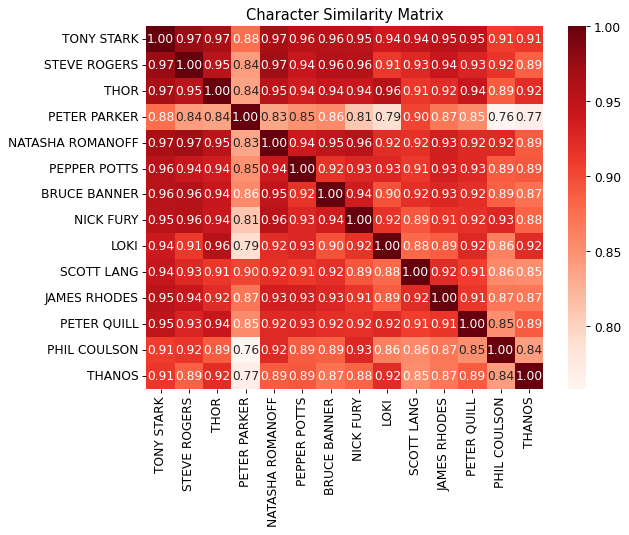

In [175]:
font = {'family' : 'sans-serif',
        'size'   : 11}

plt.rc('font', **font)
character_similarity = np.zeros(shape=(len(main_characters), len(main_characters)))

for i in range(0, len(word_count_vectors)):
    for j in range(i, len(word_count_vectors)):
        v_hat = word_count_vectors[i,:] / np.linalg.norm(word_count_vectors[i,:])
        u_hat = word_count_vectors[j,:] / np.linalg.norm(word_count_vectors[j,:])
        
        similarity_score = np.dot(v_hat, u_hat)
        
        character_similarity[i][j] = similarity_score
        character_similarity[j][i] = similarity_score

character_similarity = pd.DataFrame(character_similarity, columns=main_characters, index=main_characters)

#dump(character_similarity, "./front_end/character_similarity.joblib")
plt.figure(figsize=(8, 6), dpi=80)
sns.heatmap(character_similarity, annot=True, fmt='.2f', cmap=plt.cm.Reds)

plt.title("Character Similarity Matrix")
plt.show()

It can be seen that the characters are a lot similar to each other which is probably because they're are speaking english, which is really similar and systematic. According to Zipf's Law and the Pareto Distribution (Michael Steven) top 20% of english words ("the" "I" "he" "she") accounts for 80% of all speech. Zipf's law connects to a property of the Barabasi-Albert networks.

However it does seem that Peter Parker stands out a bit compared to the other main characters. We can look more into him by looking at the unique words for Peter Parker which could be seen in the word clouds. 

First of all Spider man (Peter Parker) has only appeared in 4 movies in this dataset, which is less than the other main characters. However a reason as to why Peter Parker stands out might be due to his age, as he is much younger than the other characters thus his lines must be different as they target a different segment and topics is more like high-school, homecoming, homework. 

Another reason could be that he is not officially part of the avenger team, but Tony's discovery and deals with more smaller problems (except when he is called in), where the remaing avenger team, deals with governments, SHIELD and large scale problems. This can have an effect as to why he stands out when looking at the similarity score. However his lines, will help him stand out if one were to try and predict 'who says what' in a machinie learning model, as his dialogue style is more unique which will make him easier to be identified. 

#### Zipf's law <a name="Zipf_law"></a>


Next we will use Zip'fs law on the manuscripts, to dive a little deeper into the theoretical aspects of the manuscripts and the words used and see if Zipf's law holds. This is done as a continuation of the similarity measures, as it was seen that many of the characters lines are similar to each other, therefor it is interesting to investigate if zipf's law holds for these manuscripts.

Zipf's law states that the frequency of a word type is inversely proportional to its rank (i.e. f × r = k, for some constant k). For example, the 50th most common word type should occur three times as frequently as the 150th most common word type. If Zipf's law hold it also supports the assumption made in the similarity matrix. 

In [176]:
def zipfs_law(text,N):
    f_dist = nltk.FreqDist(text)
    rank = 1
    ranks = []
    freqs = []
    k = []
    for s, count in f_dist.most_common(N):
        if any(c.isalpha() for c in s): # ensure it is a word
            freqs.append(f_dist.freq(s)) # appends the frequency
            ranks.append(rank) # Append the rank
            k.append(rank*f_dist.freq(s)) # compute the constant
            rank +=1 # increase rank
    
    hist, bins = np.histogram(k, bins=10)
    width = 0.7 * (bins[1] - bins[0]) # so you can see the edges
    center = (bins[:-1] + bins[1:])/2 # finding the center of the interval and making them of samme length

    fig, (ax1,ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout = True)
   
    #ax1.hist(k)
    ax1.bar(center, hist, align='center', width=width, color = 'magenta')
    ax1.set_title("Plot of k=freq*rank")
    ax1.set_xlabel("k-values")
    ax1.set_ylabel("frequency")
    
    ax2.loglog(ranks, freqs)
    ax2.set_title("Zipf's Law (log scale)")
    ax2.set_xlabel("Rank")
    ax2.set_ylabel("FReq")

    
    pylab.plot(ranks, freqs)
    ax3.set_title("Zipf's Law (Linear scale)")
    ax3.set_xlabel("Rank")
    ax3.set_ylabel("FReq")
    plt.show()

    
    return k,ranks, freqs
    

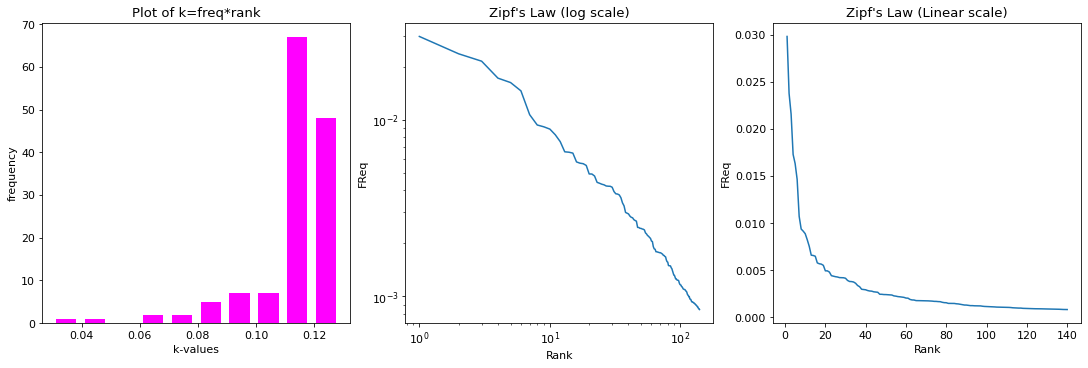

In [177]:
k,ranks, freqs = zipfs_law(text_all_movies,150)

#### Comments

When examining the three figures it is first of all seen on the log scale that linear. This means that the assumption (Zipfs law) holds. Furthermore k is plottet in a histrogram to see its distribution, where the frequency of k shows that most values is approximately 0.12. For Zipf's law to hold k must be constant as $k=f*r$ should give a constant as stated in Zipf's law. It can be seen that k is between 0.04 and 0.12 which aligns with the law. 

In respect to our analysis, this can explain why the characters are so similar to each other while in the same time being so different e.g. when looking into their sentimment score where it is seen that the characters sentiments varies quite a lot.



## Recommendations  <a name="recomentdations"></a>
After analysing the Marvel Cinematic Universe’s characters, movies and tv-series through several networks, centrality measures, community detection, sentiment scores and word clouds, we were able to understand how the story lines are connected and thus make some recommendations on which movies and tv-series to watch independently and dependently.

As mentioned earlier, it is assumed that if a character connects movies or tv-series, then the story lines within these are either dependent on or affected by the events related to the character appearances.

Many of the tv-series were in separate clusters in MCU network, they were assigned to their own community and the characters were not connected to any of the main characters within the infinity saga movies. Therefore, it is not required to watch or know either the infinity saga movies or other tv-series in order to understand the storyline within these tv-series and thus they can be watched indepently. However, it could be that a character from one tv-series shortly appears in another but it should not affect the overall understanding of the plot.

**Tv-series to watch independently:**
* Daredevil
* Jessica Jones
* Luke Cage
* Iron Fist
* The Runways
* The Punisher
* The Defenders

The movies within phase 4 were not connected to the remaining movies or characters within the infinity saga and thus these can be watched independently. 

**Movies where you do not need to understand the events of the infinity saga**
* Eternals
* Shang Chi and the legend of the ten rings


The movies within the infinity saga created a more complex cluster in the MCU network with many interconnections. The characters were not clearly separated which was also the case in the community detection. This indicates that the movies within the infinity saga are highly dependent on each other and thus one should watch them all in order to fully understand the storyline. However, the analysis showed that some characters follow their own storyline and were thus placed in separate communities than the rest of the main characters, leading us to the conclusion that these movies can be watched somewhat independently. The movies are listed beneath in a chronological order (based on https://www.radiotimes.com/movies/marvel-movies-order/)  where the colored movies are the ones that can be watched independently - though in a chronological order if there are sequels within the same storyline, for instance, “Guardian of the Galaxy” should be watched before “Guardian of the Galaxy 2”.  

**Movies within the infinity saga that can be watched dependently and idendepently:**
1. Captain America: The First Avenger (1942)
2. Captain Marvel (1995)
3. Iron Man (2010)
4. Iron Man 2 (2011)
5. The Incredible Hulk (2011)
6. <font color='purple'>**Thor (2011)**</font>  
7. The Avengers (2012)
8. Iron Man 3 (2012)
9. <font color='green'>**Thor: The Dark World (2013)**</font>  
10. Captain America: The Winter Soldier (2014)
11. <font color='blue'>**Guardians of the Galaxy (2014)**</font>  
12. <font color='blue'>**Guardians of the Galaxy 2 (2014)**</font>  
13. Avengers: Age of Ultron (2015)
14. <font color='pink'>**Ant-Man (2015)**</font> 
15. Captain America: Civil War (2016)
16. Black Widow (2016)
17. <font color='purple'>**Spider-Man: Homecoming (2016)**</font> 
18. Doctor Strange (2016-2017)
19. <font color='brown'>**Black Panther (2017)**</font> 
20. <font color='purple'>**Thor: Ragnarok (2017)**</font> 
21. Avengers: Infinity War (2017)
22. <font color='pink'>**Ant-Man and the Wasp (2017)**</font>  
23. Avengers: Endgame (2017-2022)

The tv-series that were spinoffs were highly connected to the movies within the infinity saga. Therefore, these are dependent on the events of the infinity saga, but can be watched independently as they follow a new storyline. Though there are some references to infinity saga which could be missed if the movies have not been watched. 

**Tv-series that are dependent on the infinity saga but can be watched indepently:**
* Wanda vision
* Hawkeye
* The Falcon and the winter soldier
* Agent Carter
* Loki




## Discussion  <a name="discussion"></a>
The main objective of the project was to guide the reader through the Marvel Cinematic Universe and to make recommendations about which movies to watch independently and dependently in order to fully understand the story lines. Through a lot of web-scraping, data cleaning and preprocessing and a thorough network and sentiment analysis, we were able to obtain a sufficient amount of information in order to make recommendations. We were able to provide the user with an understanding of the most important characters, teams and organizations within the MCU, through several network representations. Furthermore, we illustrated how the main characters were connected to the different movies and tv-series within the MCU and how they could be separated into different communities. These findings all contributed to the understanding of how the different storylines are connected. 


The sentiment analysis enabled us to understand the characters within the infinity saga better as the sentiment scores reflected certain characteristics. Our expectations were that sentiment scores would reflect the movie’s events, however, this was not the case. It was discovered that the main character's characterics had a larger influence on the sentiment score than the movie’s events. For instance, Iron Man had a positive sentiment based on the manuscript from the Infinity War movie even though he loses a lot of friends as the movie is centered around death and destruction. The sentiment analysis did thus not provide insights about how the movies and storylines within these changed through time which could have been interesting. In order to obtain more knowledge within this area one could include descriptions of the movie plots or comic books.


Our creation could further be improved by illustrating the order of the movies better within the network representations as currently only the phases are visualised. In the attempt to do this, we tried to make a dynamic network where nodes were added according to the order of the movies and we also tried to change the shape of the nodes to numbers but did not succeed. 


The network representations were created using pyvis which enabled greater insights through interactive and dynamic viasuations. However, the visualisations are computationally heavy and the load time is quite long due to the large amount of data that the networks consist of. This has affected the process as we had to redesign the web page such that all large networks were in dropdown menus where only one could be loaded at time. It has also affected the end product as the load time for webpage and explainer notebook is quite long. Alternatively, one could have used more simple representations such as ForceAtlas, however, this would have compromised the quality and understanding of the networks.




### Further work <a name="further_analysis"></a> 

If we had more time for the project, we would have included a network representation with focus on temporal changes within each movie. This way we could illustrate the current states for each character by only including the links and characters relevant for specific movies. This would enable us to investigate the character's development through centrality measures and get more insights into how the communities would change and if new communities would arise as the storylines evolve.  

It was decided to only focus on the Cinematic Universe due to the given time frame, however, it would be interesting to extend the analysis and include comics and X-men if more time was available. It could be interesting to compare the comics network to the cinematic universe in order to see if characters are portrayed in the same way and if the storylines could be seperated in the same way. Furthermore, the sentiment of the comics could perhaps reveal more detailed insights into the development of the storylines through the events and not just the character characteristic. 

In order to improve our recommendations further, one could include data such as movie reviews and ratings, genre and plots to develop personalized recommendations. This way the end user would get a list of the movies within their interest and thus the recommendations would provide more value for the individual. 


## Contribution  <a name="contribution"></a>


In [184]:
explainer = {'Element': ["Motivation", "Basic Stats: Preprocessing","Network visualisation", "Basic Stats: Explorative Analysis", 
                         "Tools, Theory and analysis: Community","Tools, Theory and analysis: Sentiment","Discussion","Webpage"], 
             'Main Responsible': ["Malene", "Malene og Katinka", "Malene", "Katinka", "Malene","Katinka","Katinka","Malene og Katinka"]}
pd.DataFrame(data=explainer)

Element   Main Responsible
0                             Motivation             Malene
1             Basic Stats: Preprocessing  Malene og Katinka
2                  Network visualisation             Malene
3      Basic Stats: Explorative Analysis            Katinka
4  Tools, Theory and analysis: Community             Malene
5  Tools, Theory and analysis: Sentiment            Katinka
6                             Discussion            Katinka
7                                Webpage  Malene og Katinka